In [8]:
pretrained = './logs/baseline/output/resnet10_simclr_LS_default/pretrain_state_1000.pt'

In [9]:
body = './logs/baseline/output/resnet10_simclr_LS_default/mini_test/05way_001shot_full_default/body_001.pt'

In [6]:
import torch

In [ ]:
state = torch.load(pretrained)

In [ ]:
body_model = torch.load_state_dict(body)

AttributeError: module 'torch' has no attribute 'load_state_dict'

In [2]:
import pandas as pd
from sklearn.manifold import TSNE
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
import seaborn as sns
from scipy import signal
#import seaborn as sns; sns.set()

datas = ['mini_test', 'crop','euro', 'isic', 'chest']
import matplotlib
myfonts = "Times New Roman"
#matplotlib.rcParams['font.family'] = "sans-serif"
matplotlib.rcParams['font.family'] = myfonts

In [5]:
path = './logs/baseline/output/resnet10_simclr_LS_default/mini_test/05way_001shot_full_default/v_score_query.csv'

In [8]:
df = pd.read_csv(path, index_col='Unnamed: 0')

### Query V-score

In [107]:
v_score.std()

epoch0      0.034853
epoch1      0.034693
epoch2      0.035384
epoch3      0.034333
epoch4      0.033463
              ...   
epoch96     0.032204
epoch97     0.033619
epoch98     0.033543
epoch99     0.033082
epoch100    0.032440
Length: 101, dtype: float64

In [108]:
v_score

,epoch0,epoch1,epoch2,epoch3,epoch4,epoch5,epoch6,epoch7,epoch8,epoch9,...,epoch91,epoch92,epoch93,epoch94,epoch95,epoch96,epoch97,epoch98,epoch99,epoch100
1,0.073506,0.058850,0.090185,0.069550,0.098486,0.064774,0.069161,0.107079,0.069683,0.110638,...,0.103508,0.067639,0.091836,0.065957,0.132260,0.063764,0.078566,0.087703,0.077065,0.090234
2,0.103667,0.073985,0.090706,0.063595,0.081680,0.119272,0.070876,0.115069,0.128931,0.063692,...,0.064905,0.133515,0.140570,0.115219,0.130929,0.065967,0.124325,0.159225,0.088062,0.130173
3,0.123964,0.108444,0.077681,0.129941,0.070250,0.077915,0.074202,0.048134,0.095795,0.061484,...,0.041964,0.079712,0.042785,0.060284,0.106967,0.102336,0.056002,0.064671,0.045370,0.046384
4,0.125576,0.079242,0.110720,0.094330,0.077153,0.075268,0.074582,0.078205,0.142096,0.088776,...,0.086742,0.081573,0.064173,0.067438,0.048692,0.050286,0.102837,0.184601,0.065064,0.122232
5,0.117055,0.171605,0.086671,0.121140,0.118057,0.083680,0.101938,0.072508,0.127035,0.076123,...,0.086203,0.092531,0.082936,0.102752,0.114982,0.089062,0.095955,0.124830,0.077438,0.103927
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
596,0.132248,0.109206,0.064771,0.146835,0.128242,0.131995,0.119365,0.113547,0.132063,0.072002,...,0.074815,0.134921,0.061114,0.144937,0.156408,0.133869,0.125608,0.112742,0.092264,0.056918
597,0.094031,0.110252,0.105042,0.103650,0.103466,0.099112,0.132451,0.099353,0.075051,0.090175,...,0.134819,0.101692,0.123711,0.130895,0.134133,0.094125,0.088580,0.084155,0.061415,0.138312
598,0.140177,0.120684,0.191546,0.120387,0.105304,0.115056,0.123750,0.122699,0.144384,0.125139,...,0.110048,0.145288,0.138792,0.114976,0.161608,0.127269,0.163154,0.179088,0.136646,0.142871
599,0.104077,0.116650,0.150586,0.131235,0.137582,0.135255,0.093667,0.143681,0.105047,0.127983,...,0.075089,0.093873,0.132787,0.084871,0.125747,0.075729,0.094056,0.159150,0.105323,0.160621


In [ ]:
'./logs/baseline/output/resnet10_simclr_LS_default/mini_test/05way_001shot_full_default/augmentation/base/test_history.csv'

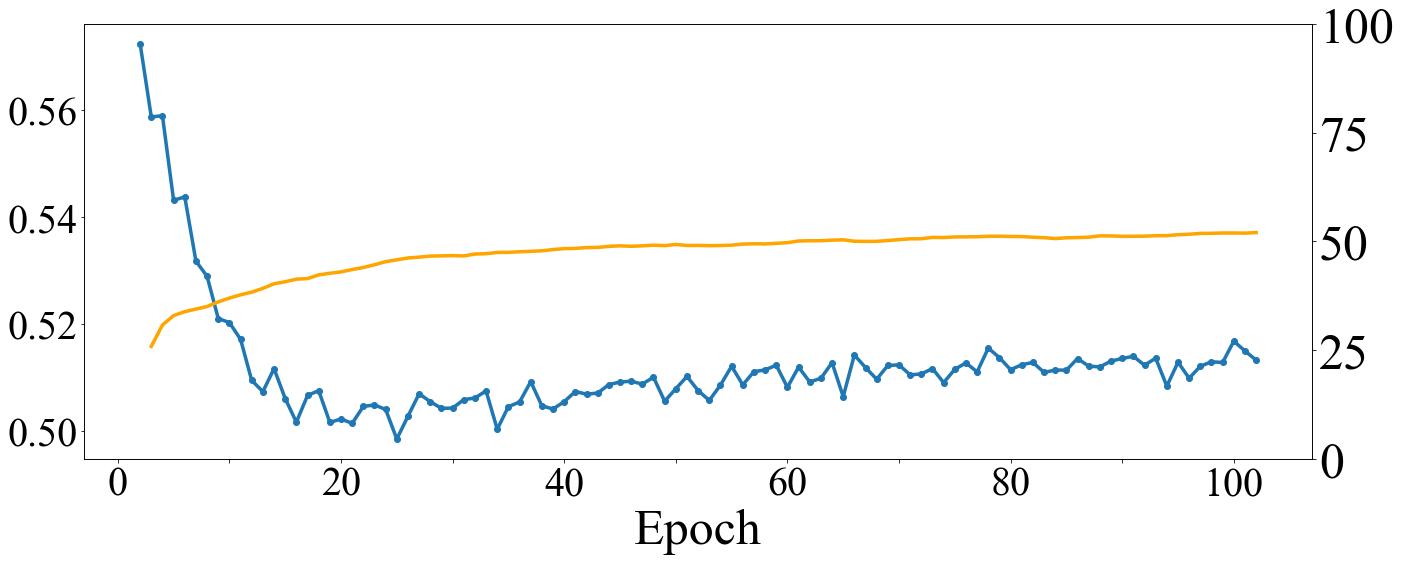

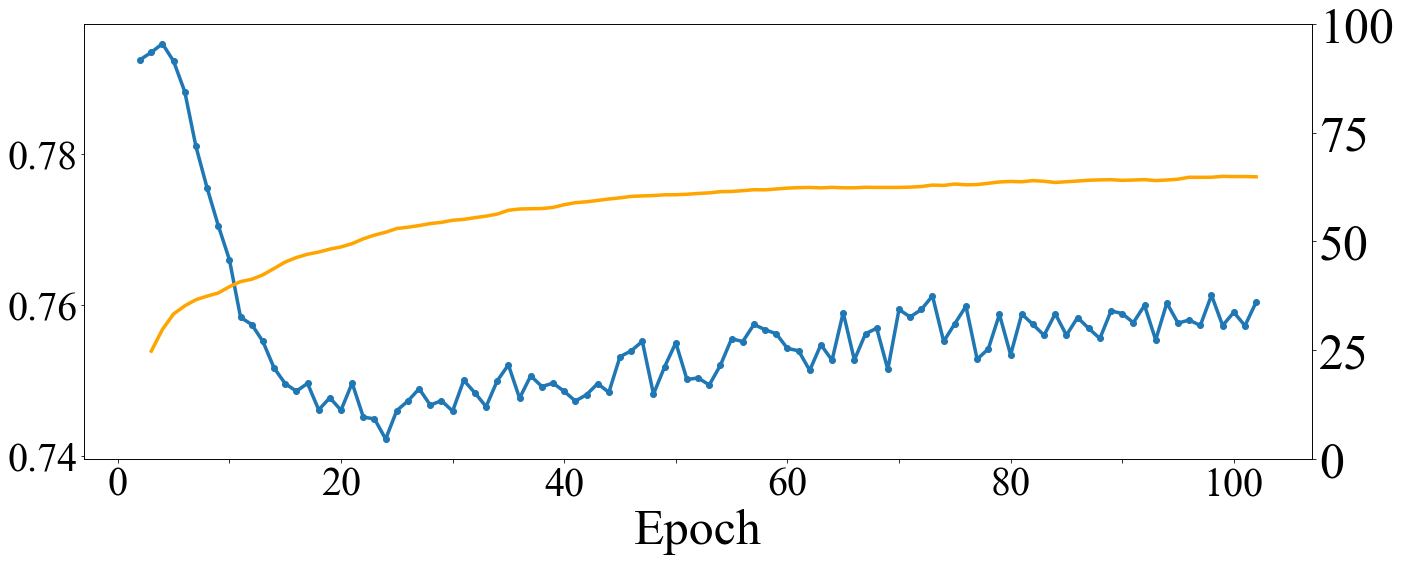

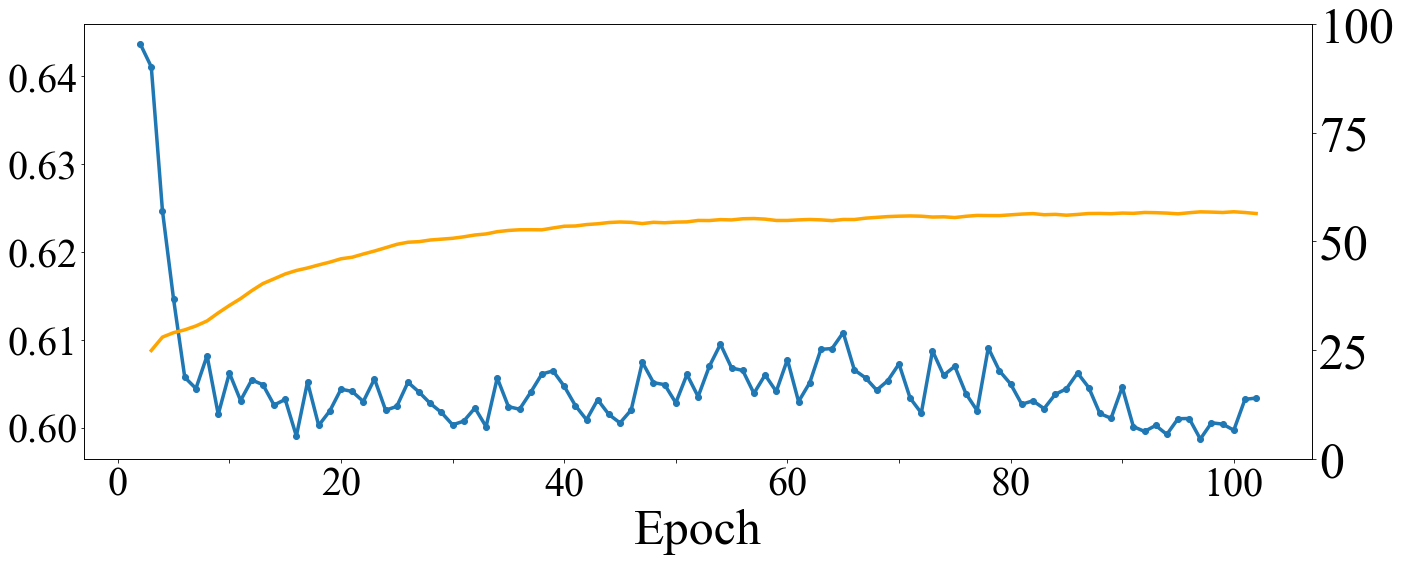

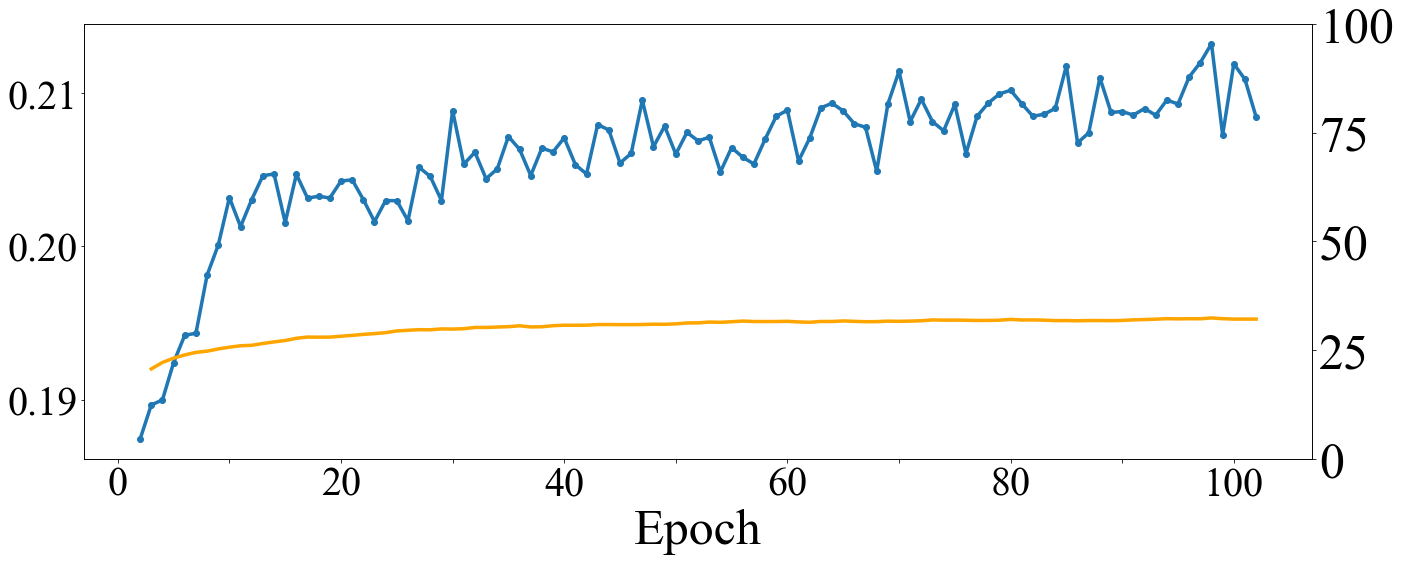

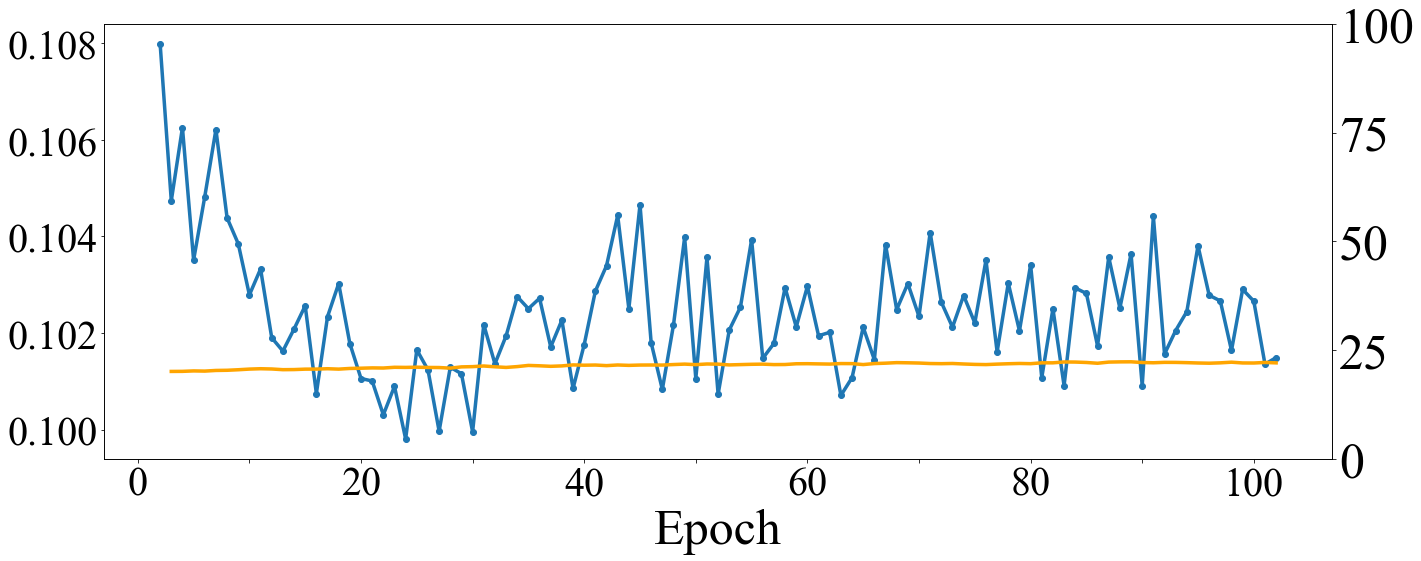

In [188]:
for data in datas:
    fig, ax1 = plt.subplots(figsize = (22, 8))
    v_score = pd.read_csv('./logs/baseline/output/resnet10_simclr_LS_default/{}/05way_001shot_full_default/augmentation/base/v_score_query.csv'.format(data), index_col='Unnamed: 0')
    v_std = v_score.std()
    test_acc = pd.read_csv('./logs/baseline/output/resnet10_simclr_LS_default/{}/05way_001shot_full_default/augmentation/base/test_history.csv'.format(data), index_col='Unnamed: 0')
    test_acc['epoch0'] = None
    test_acc = test_acc.reindex(columns=['epoch{}'.format(i) for i in range(0, 101)])
    ax1.plot(v_score.mean(), linewidth=3.5, marker='o')
    #ax1.errorbar(v_score.columns, v_score.mean(), yerr=v_std, fmt='-o')
    plt.xticks(np.arange(-2, 101, 10), ('0', '', '20', '', '40', '', '60', '', '80', '', '100'), fontsize = 50)
    ax2 = ax1.twinx()
    ax1.tick_params(labelsize=40)
    ax2.tick_params(labelsize=50)
    ax2.plot(test_acc.mean()*100, linewidth=3.5, color = 'orange')
    ax2.set_ylim(0, 100)
    ax1.set_xlabel("Epoch", fontsize=50)
    #plt.title(data, fontsize=40)
    plt.savefig('./img_pdf/augmentation/base/v_score/query/1shot_{}.pdf'.format(data), bbox_inches='tight', format='pdf')
    # plt.legend(fontsize=20, loc=1)
#plt.close()

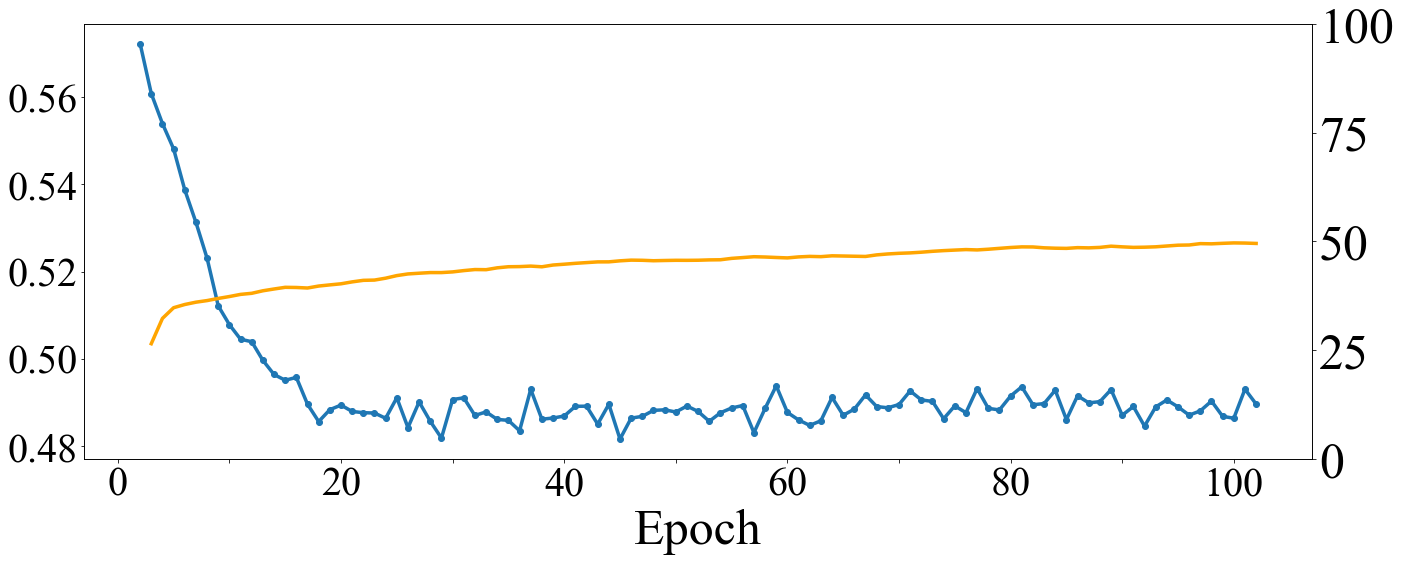

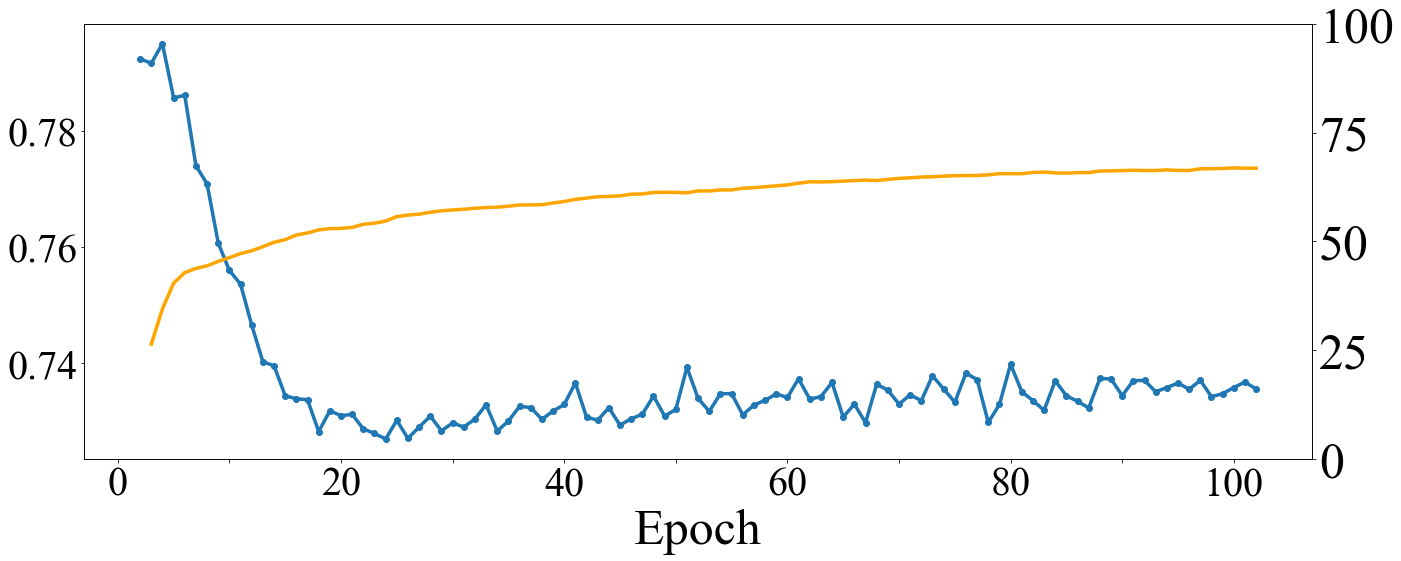

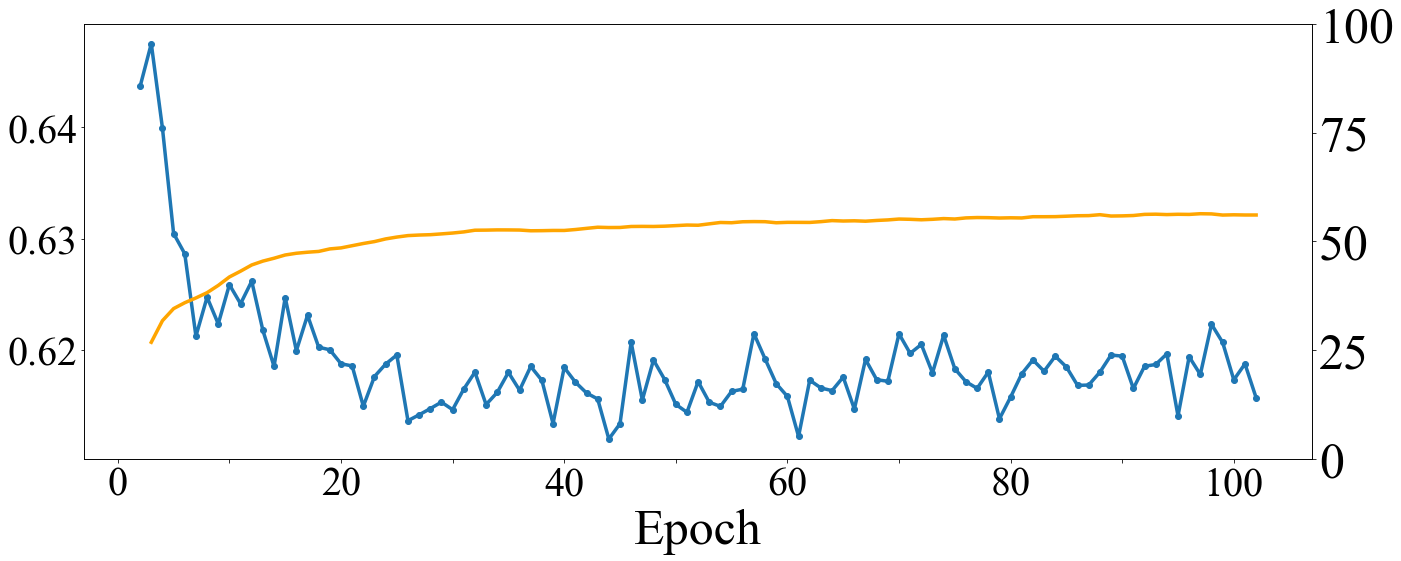

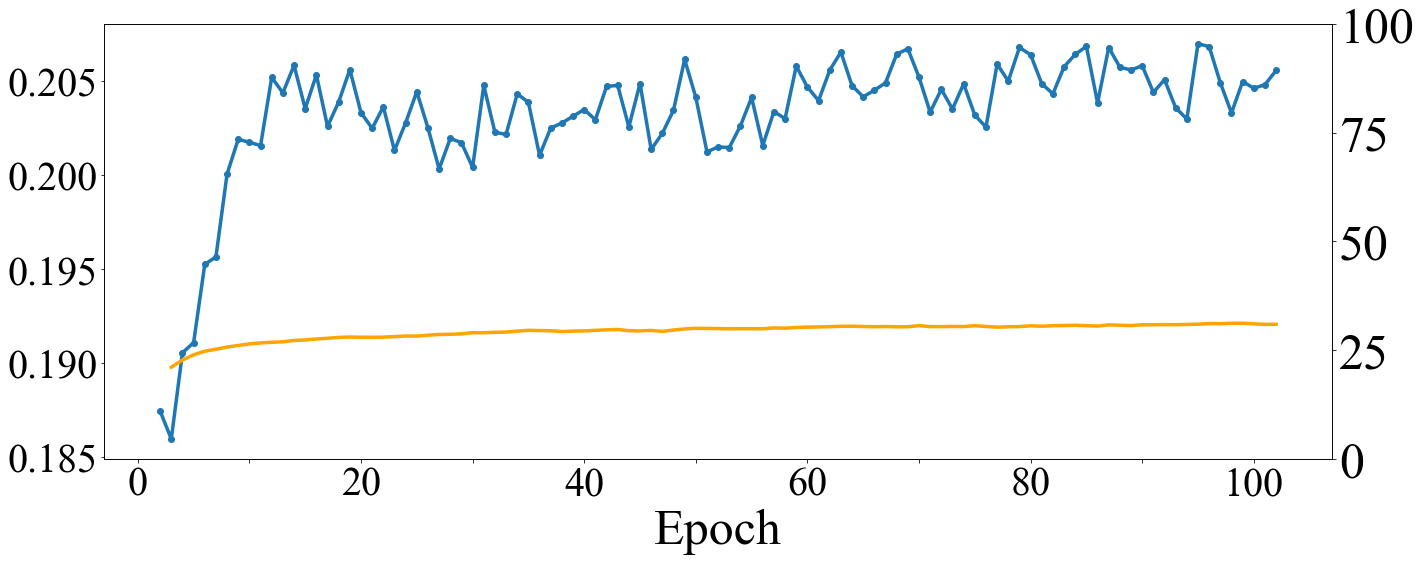

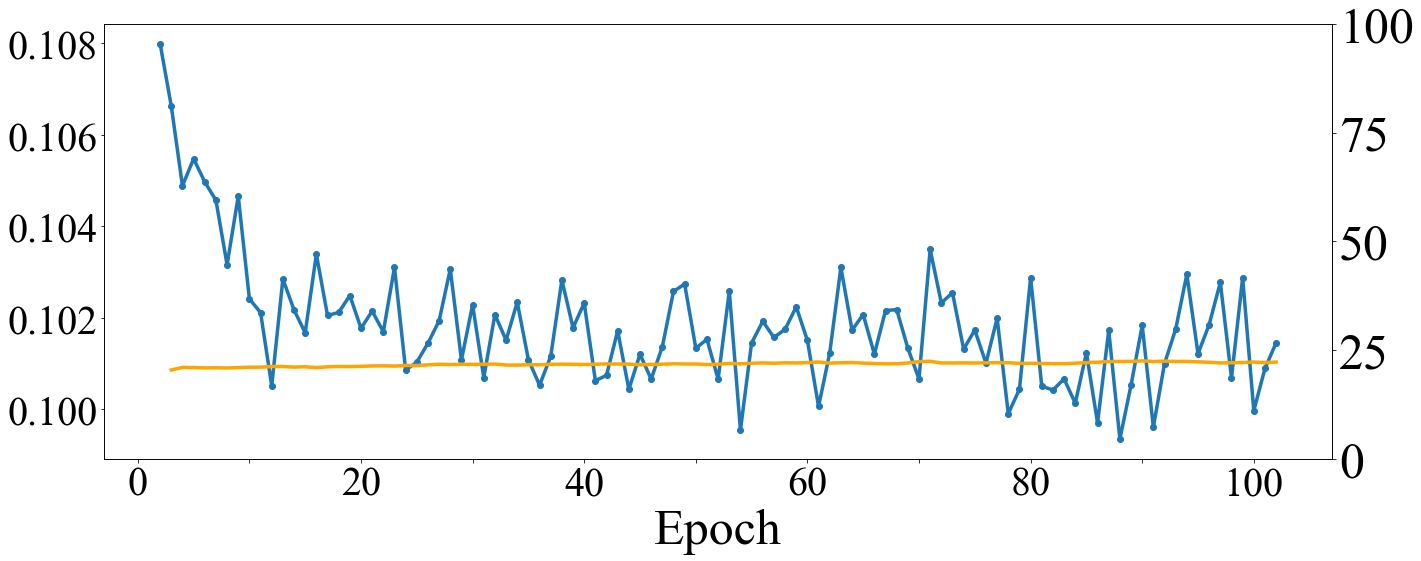

In [173]:
for data in datas:
    fig, ax1 = plt.subplots(figsize = (22, 8))
    v_score = pd.read_csv('./logs/baseline/output/resnet10_simclr_LS_default/{}/05way_001shot_full_default/v_score_query.csv'.format(data), index_col='Unnamed: 0')
    v_std = v_score.std()
    test_acc = pd.read_csv('./logs/baseline/output/resnet10_simclr_LS_default/{}/05way_001shot_full_default/test_history.csv'.format(data), index_col='Unnamed: 0')
    test_acc['epoch0'] = None
    test_acc = test_acc.reindex(columns=['epoch{}'.format(i) for i in range(0, 101)])
    ax1.plot(v_score.mean(), linewidth=3.5, marker='o')
    #ax1.errorbar(v_score.columns, v_score.mean(), yerr=v_std, fmt='-o')
    plt.xticks(np.arange(-2, 101, 10), ('0', '', '20', '', '40', '', '60', '', '80', '', '100'), fontsize = 50)
    ax2 = ax1.twinx()
    ax1.tick_params(labelsize=40)
    ax2.tick_params(labelsize=50)
    ax2.plot(test_acc.mean()*100, linewidth=3.5, color = 'orange')
    ax2.set_ylim(0, 100)
    ax1.set_xlabel("Epoch", fontsize=50)
    #plt.title(data, fontsize=40)
    plt.savefig('./img_pdf/v_score/query/err/1shot_{}.pdf'.format(data), bbox_inches='tight', format='pdf')
    # plt.legend(fontsize=20, loc=1)
#plt.close()

In [160]:

test_acc

,epoch1,epoch2,epoch3,epoch4,epoch5,epoch6,epoch7,epoch8,epoch9,epoch10,...,epoch92,epoch93,epoch94,epoch95,epoch96,epoch97,epoch98,epoch99,epoch100,epoch0
1,0.173333,0.2,0.2,0.2,0.24,0.226667,0.226667,0.173333,0.173333,0.2,...,0.2,0.24,0.24,0.24,0.213333,0.213333,0.226667,0.2,0.24,None
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,None
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,None
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,None
5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
596,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,None
597,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,None
598,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,None
599,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,None


In [163]:
test_acc = test_acc.reindex(columns=['epoch{}'.format(i) for i in range(0, 101)])
test_acc

,epoch0,epoch1,epoch2,epoch3,epoch4,epoch5,epoch6,epoch7,epoch8,epoch9,...,epoch91,epoch92,epoch93,epoch94,epoch95,epoch96,epoch97,epoch98,epoch99,epoch100
1,None,0.173333,0.2,0.2,0.2,0.24,0.226667,0.226667,0.173333,0.173333,...,0.2,0.2,0.24,0.24,0.24,0.213333,0.213333,0.226667,0.2,0.24
2,None,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,None,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,None,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,None,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
596,None,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
597,None,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
598,None,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
599,None,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


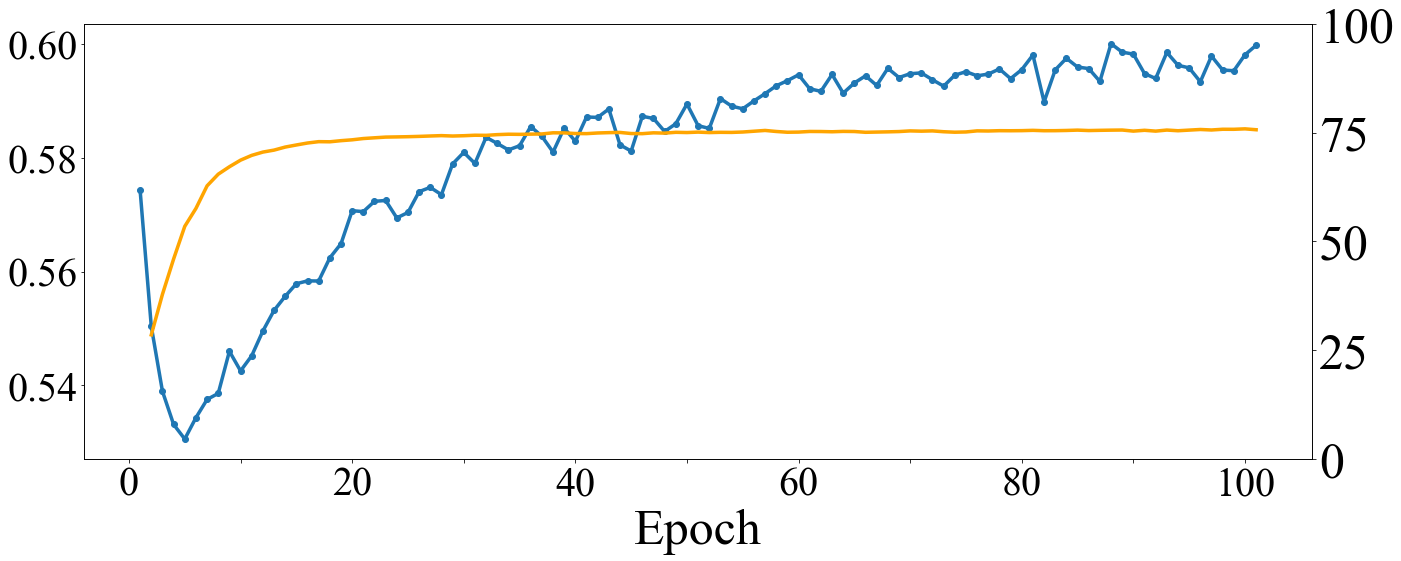

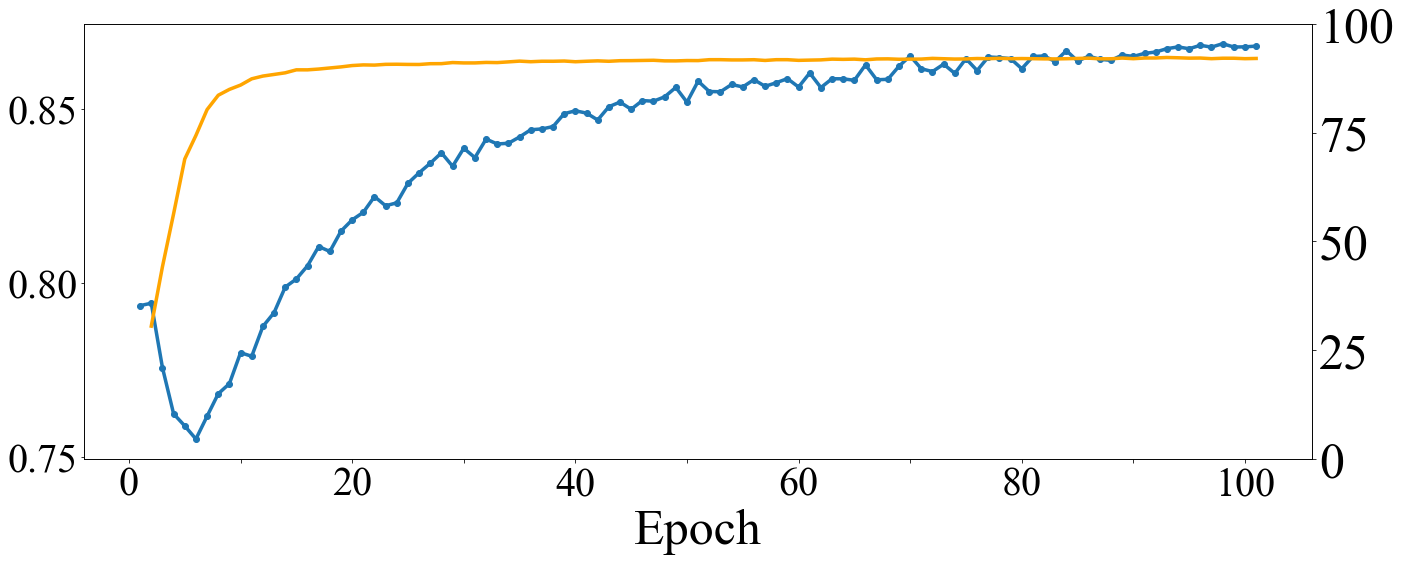

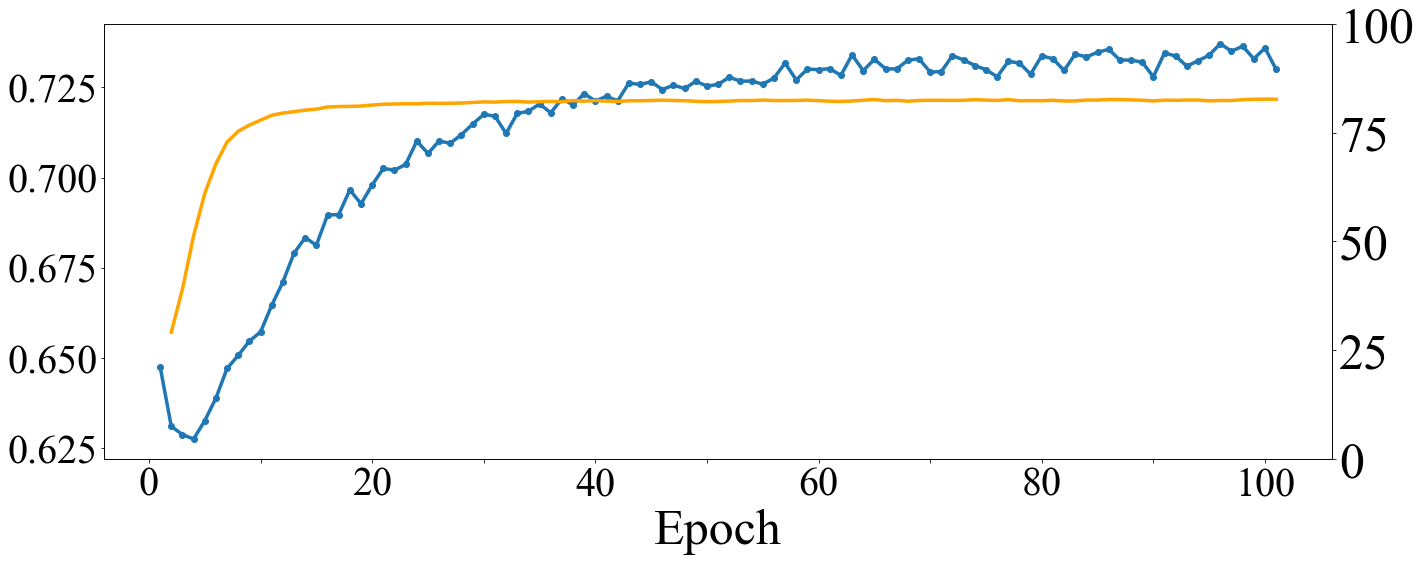

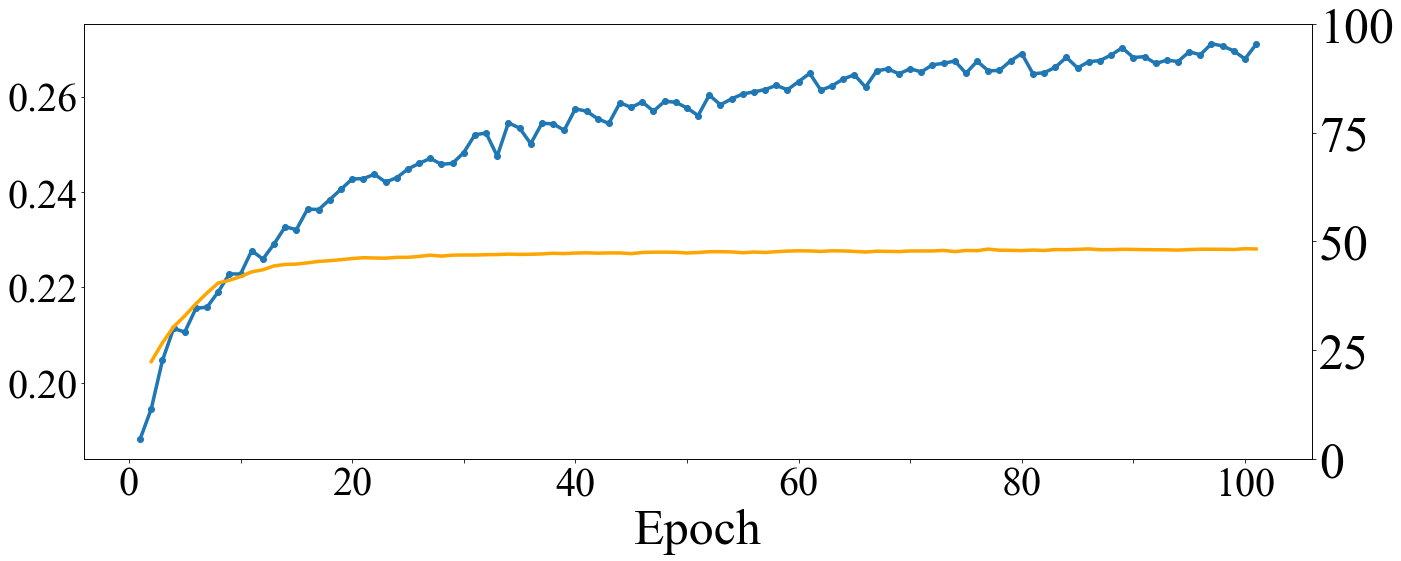

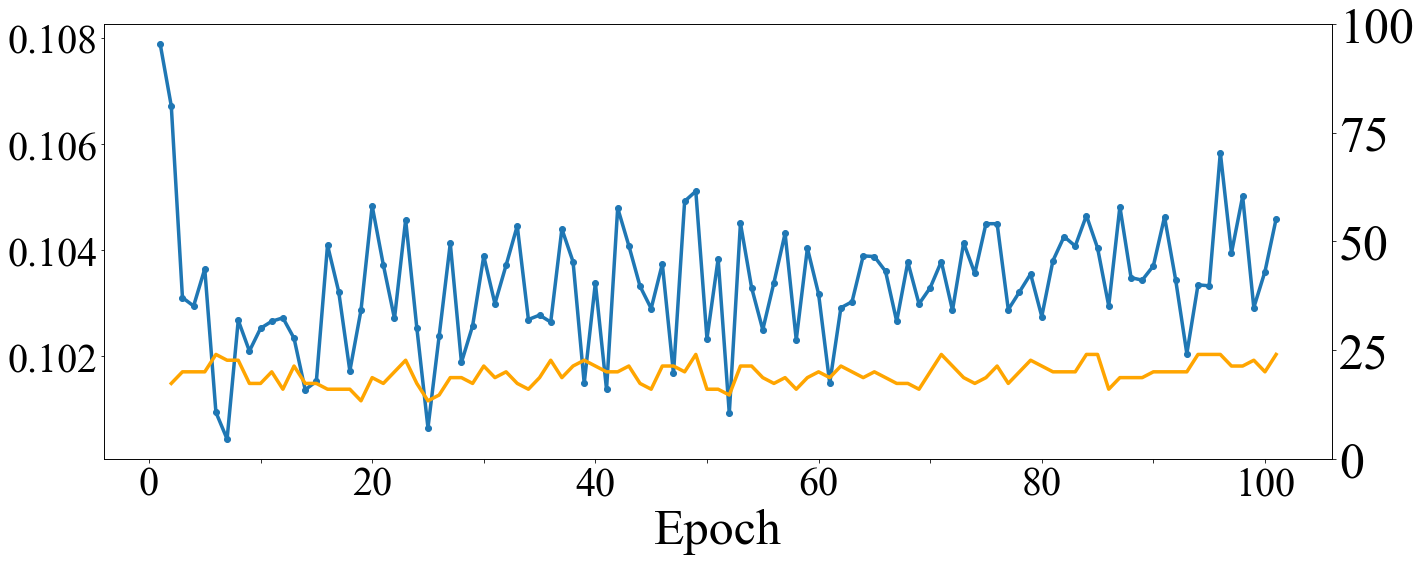

In [174]:
for data in datas:
    fig, ax1 = plt.subplots(figsize = (22, 8))
    v_score = pd.read_csv('./logs/baseline/output/resnet10_simclr_LS_default/{}/05way_005shot_full_default/v_score_query.csv'.format(data), index_col='Unnamed: 0')
    v_std = v_score.std()
    test_acc = pd.read_csv('./logs/baseline/output/resnet10_simclr_LS_default/{}/05way_005shot_full_default/test_history.csv'.format(data), index_col='Unnamed: 0')
    test_acc['epoch0'] = None
    test_acc = test_acc.reindex(columns=['epoch{}'.format(i) for i in range(0, 101)])
    ax1.plot(v_score.mean(), linewidth=3.5, marker='o')
    #ax1.errorbar(v_score.columns, v_score.mean(), yerr=v_std, fmt='-o')
    plt.xticks(np.arange(-1, 100, 10), ('0', '', '20', '', '40', '', '60', '', '80', '', '100'), fontsize = 50)
    ax2 = ax1.twinx()
    ax1.tick_params(labelsize=40)
    ax2.tick_params(labelsize=50)
    ax2.plot(test_acc.mean()*100, linewidth=3.5, color = 'orange')
    ax2.set_ylim(0, 100)
    ax1.set_xlabel("Epoch", fontsize=50)
    #plt.title(data, fontsize=40)
    plt.savefig('./img_pdf/v_score/query/5shot_{}.pdf'.format(data), bbox_inches='tight', format='pdf')
    # plt.legend(fontsize=20, loc=1)
#plt.close()


# for data in ['mini_test', 'crop','euro']:
#     v_score = pd.read_csv('./logs/baseline/output/resnet10_simclr_LS_default/{}/05way_005shot_full_default/v_score_support.csv'.format(data), index_col='Unnamed: 0')
#     fig = plt.figure(figsize=(22,6))
#     plt.plot(v_score.mean())
#     plt.xticks(np.arange(-1, 100, 10), fontsize = 25)
#     # plt.yticks(np.arange(0, 101, 10), fontsize = 20)
#     plt.ylabel("V measurement score", fontsize=30)
#     plt.title(data, fontsize=40)
#     plt.savefig('./img_pdf/v_score/support/5shot_{}.pdf'.format(data), bbox_inches='tight', format='pdf')
#     # plt.legend(fontsize=20, loc=1)
# #plt.close()

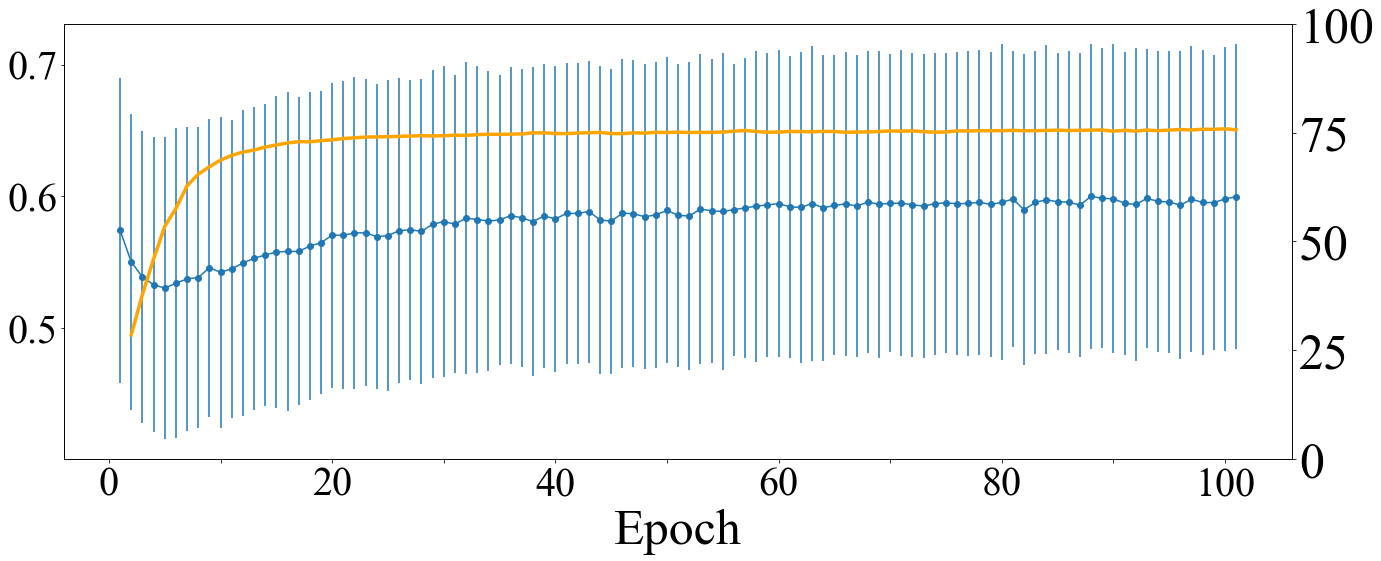

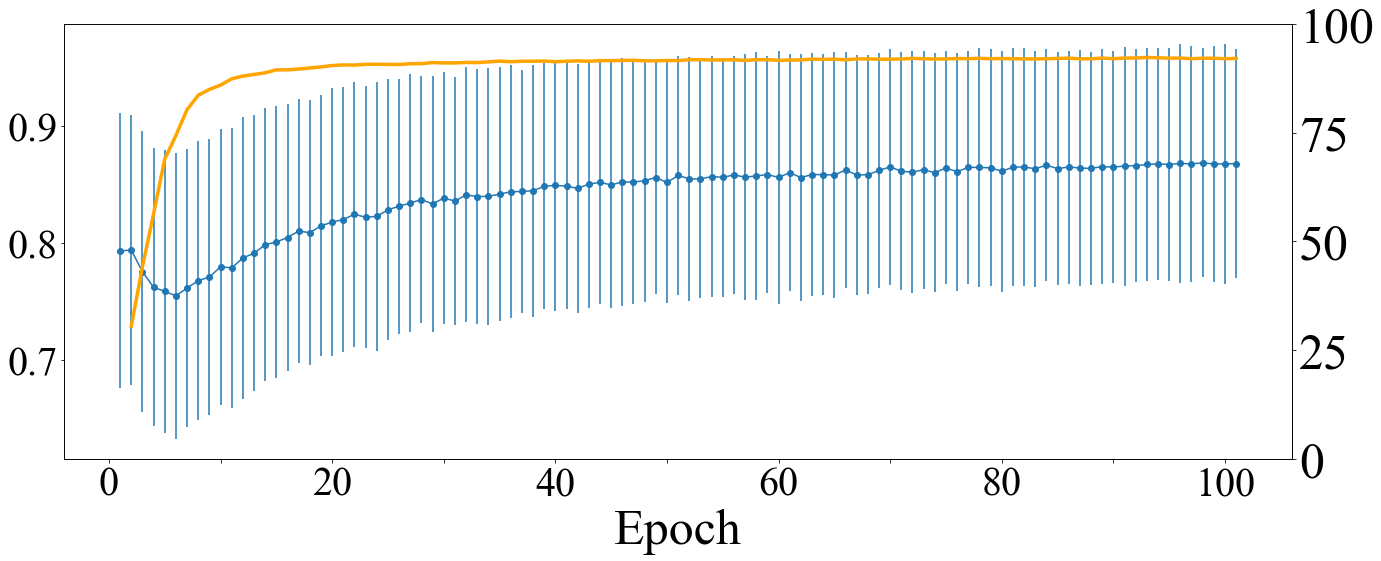

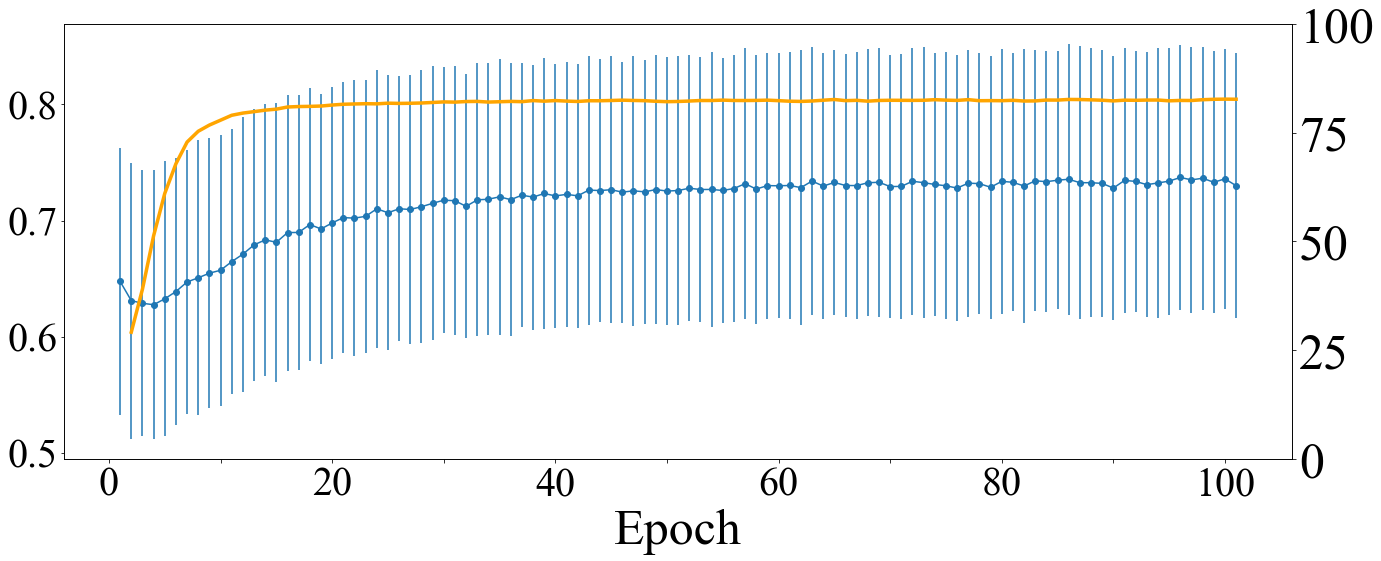

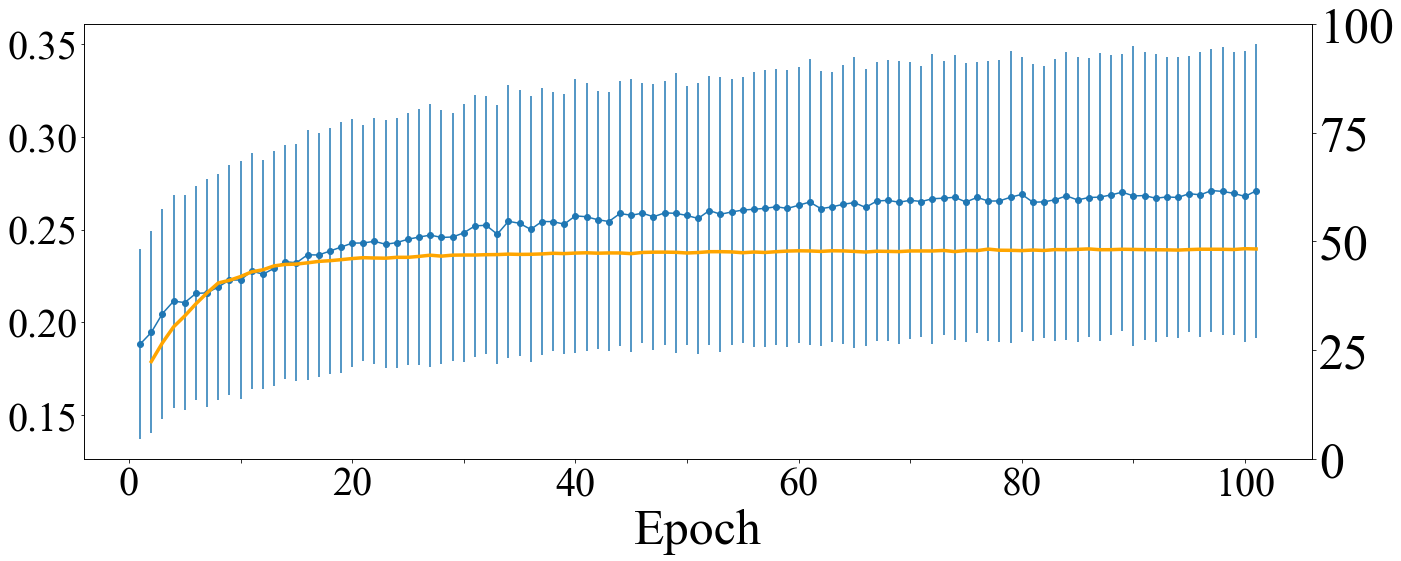

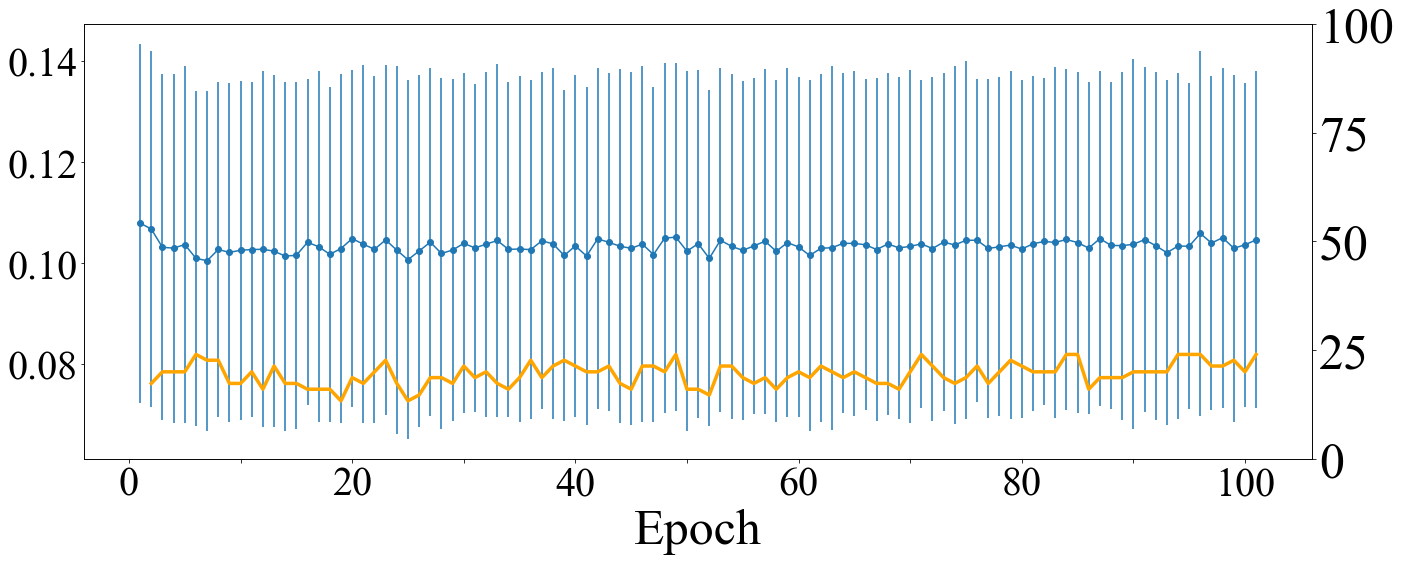

In [175]:
for data in datas:
    fig, ax1 = plt.subplots(figsize = (22, 8))
    v_score = pd.read_csv('./logs/baseline/output/resnet10_simclr_LS_default/{}/05way_005shot_full_default/v_score_query.csv'.format(data), index_col='Unnamed: 0')
    v_std = v_score.std()
    test_acc = pd.read_csv('./logs/baseline/output/resnet10_simclr_LS_default/{}/05way_005shot_full_default/test_history.csv'.format(data), index_col='Unnamed: 0')
    test_acc['epoch0'] = None
    test_acc = test_acc.reindex(columns=['epoch{}'.format(i) for i in range(0, 101)])
    #ax1.plot(v_score.mean(), linewidth=3.5, marker='o')
    ax1.errorbar(v_score.columns, v_score.mean(), yerr=v_std, fmt='-o')
    plt.xticks(np.arange(-1, 100, 10), ('0', '', '20', '', '40', '', '60', '', '80', '', '100'), fontsize = 50)
    ax2 = ax1.twinx()
    ax1.tick_params(labelsize=40)
    ax2.tick_params(labelsize=50)
    ax2.plot(test_acc.mean()*100, linewidth=3.5, color = 'orange')
    ax2.set_ylim(0, 100)
    ax1.set_xlabel("Epoch", fontsize=50)
    #plt.title(data, fontsize=40)
    plt.savefig('./img_pdf/v_score/query/err/5shot_{}.pdf'.format(data), bbox_inches='tight', format='pdf')
    # plt.legend(fontsize=20, loc=1)
#plt.close()


# for data in ['mini_test', 'crop','euro']:
#     v_score = pd.read_csv('./logs/baseline/output/resnet10_simclr_LS_default/{}/05way_005shot_full_default/v_score_support.csv'.format(data), index_col='Unnamed: 0')
#     fig = plt.figure(figsize=(22,6))
#     plt.plot(v_score.mean())
#     plt.xticks(np.arange(-1, 100, 10), fontsize = 25)
#     # plt.yticks(np.arange(0, 101, 10), fontsize = 20)
#     plt.ylabel("V measurement score", fontsize=30)
#     plt.title(data, fontsize=40)
#     plt.savefig('./img_pdf/v_score/support/5shot_{}.pdf'.format(data), bbox_inches='tight', format='pdf')
#     # plt.legend(fontsize=20, loc=1)
# #plt.close()

In [156]:
v_score

,epoch1,epoch2,epoch3,epoch4,epoch5,epoch6,epoch7,epoch8,epoch9,epoch10,...,epoch91,epoch92,epoch93,epoch94,epoch95,epoch96,epoch97,epoch98,epoch99,epoch100
1,0.299425,0.201627,0.171379,0.312916,0.233825,0.235530,0.409217,0.284364,0.274033,0.460588,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
2,0.247519,0.340058,0.236767,0.293632,0.272542,0.245324,0.343313,0.334862,0.313595,0.440375,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
3,0.218429,0.305284,0.171093,0.336856,0.187926,0.276129,0.410412,0.454455,0.517907,0.624674,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
4,0.271094,0.261631,0.213314,0.241202,0.154604,0.306487,0.295395,0.177069,0.408602,0.309895,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
5,0.283326,0.274591,0.316790,0.293407,0.349285,0.364123,0.281630,0.269260,0.284592,0.351861,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
596,0.276938,0.213268,0.290025,0.353408,0.302448,0.322321,0.319153,0.237950,0.379352,0.339620,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
597,0.265424,0.301474,0.218217,0.253259,0.246719,0.262240,0.308482,0.459060,0.546720,0.582537,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
598,0.229243,0.194551,0.260180,0.244218,0.306956,0.288645,0.245345,0.304265,0.298741,0.343630,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
599,0.334319,0.386916,0.366784,0.288852,0.302667,0.298649,0.367352,0.384309,0.314392,0.578370,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0


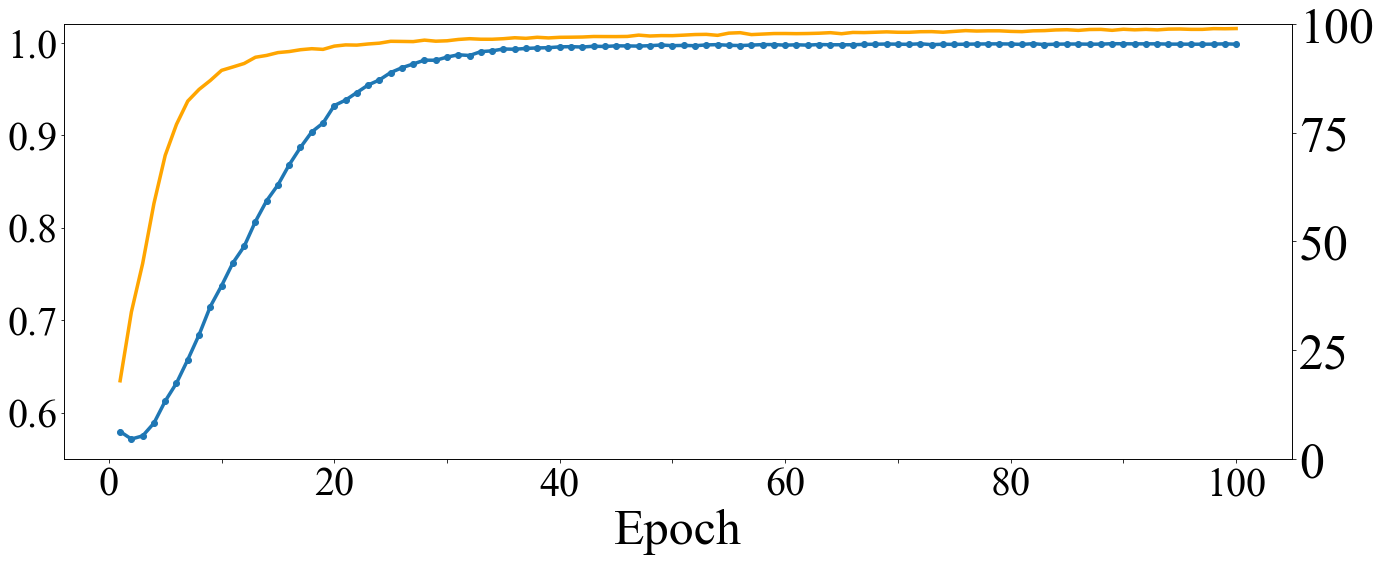

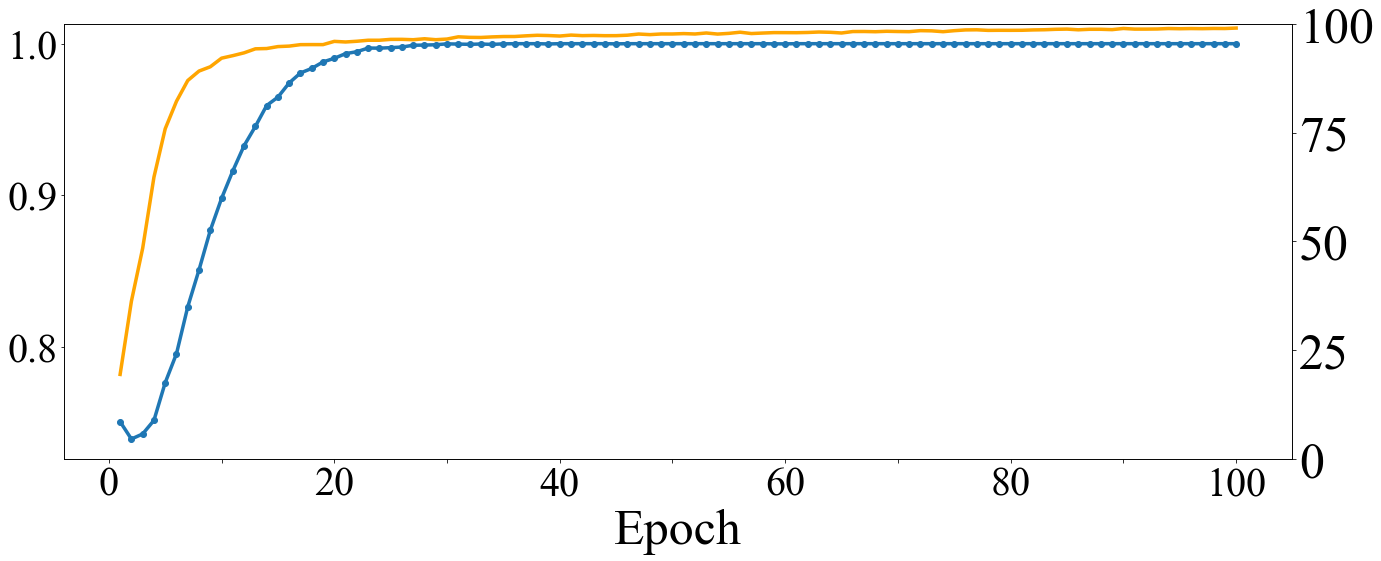

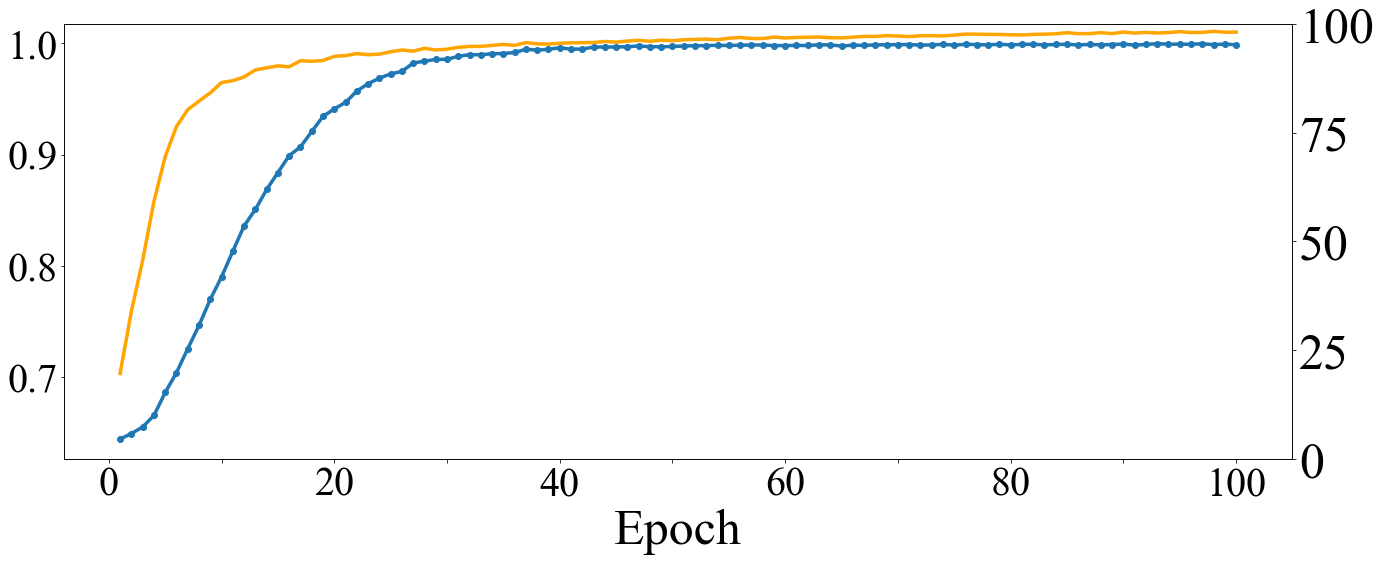

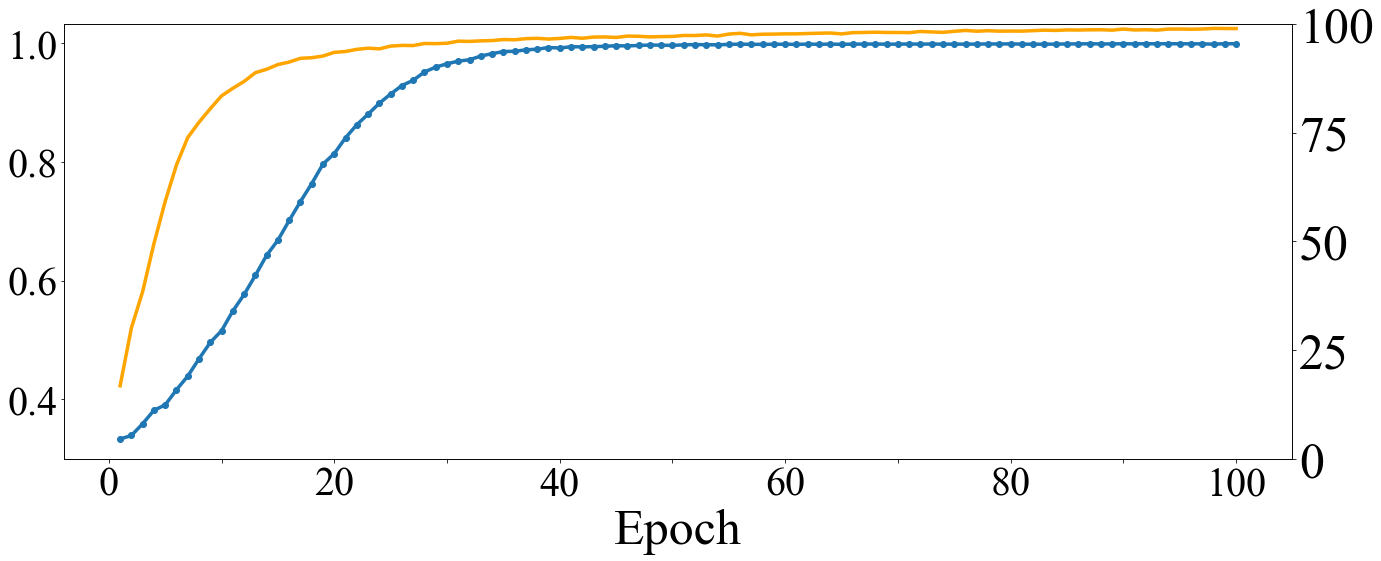

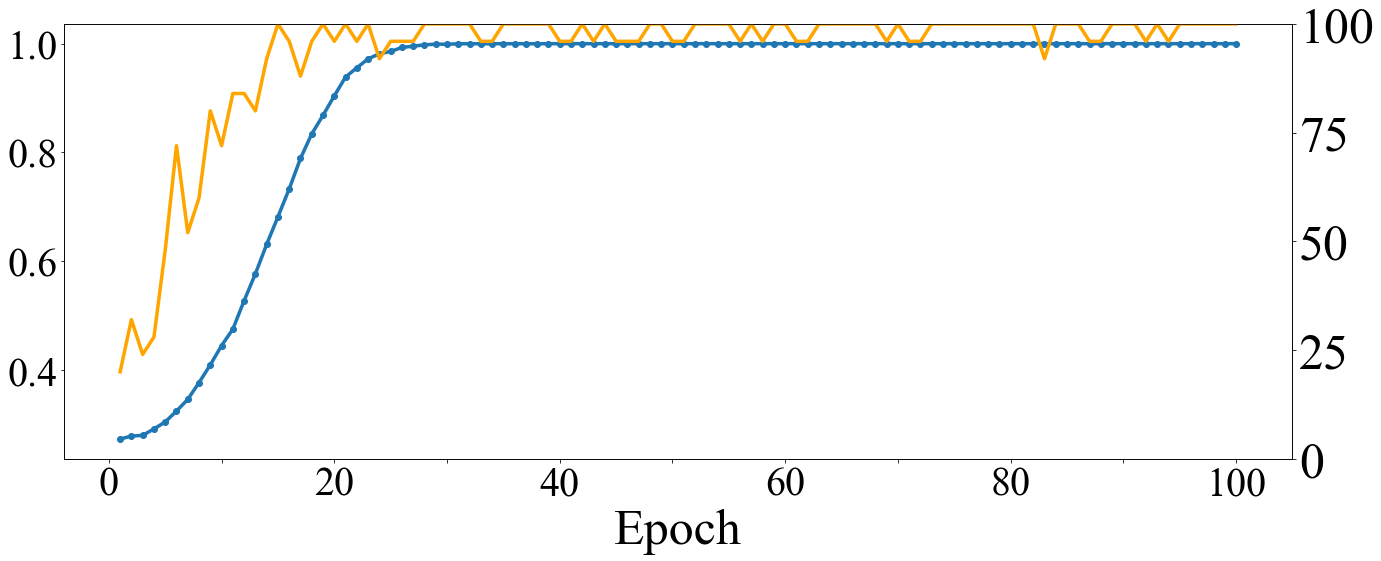

In [155]:
for data in datas:
    fig, ax1 = plt.subplots(figsize = (22, 8))
    v_score = pd.read_csv('./logs/baseline/output/resnet10_simclr_LS_default/{}/05way_005shot_full_default/v_score_support.csv'.format(data), index_col='Unnamed: 0')
    v_std = v_score.std()
    test_acc = pd.read_csv('./logs/baseline/output/resnet10_simclr_LS_default/{}/05way_005shot_full_default/train_history.csv'.format(data), index_col='Unnamed: 0')
    ax1.plot(v_score.mean(), linewidth=3.5, marker='o')
    #ax1.errorbar(v_score.columns, v_score.mean(), yerr=v_std, fmt='-o')
    plt.xticks(np.arange(-1, 100, 10), ('0', '', '20', '', '40', '', '60', '', '80', '', '100'), fontsize = 50)
    ax2 = ax1.twinx()
    ax1.tick_params(labelsize=40)
    ax2.tick_params(labelsize=50)
    ax2.plot(test_acc.mean()*100, linewidth=3.5, color = 'orange')
    ax2.set_ylim(0, 100)
    ax1.set_xlabel("Epoch", fontsize=50)
    #plt.title(data, fontsize=40)
    plt.savefig('./img_pdf/v_score/support/5shot_{}.pdf'.format(data), bbox_inches='tight', format='pdf')
    # plt.legend(fontsize=20, loc=1)
#plt.close()


# for data in ['mini_test', 'crop','euro', 'isic']:
#     v_score = pd.read_csv('./logs/baseline/output/resnet10_simclr_LS_default/{}/05way_005shot_full_default/v_score_query.csv'.format(data), index_col='Unnamed: 0')
#     fig = plt.figure(figsize=(22,6))
#     plt.plot(v_score.mean())
#     plt.xticks(np.arange(-1, 100, 10), fontsize = 20)
#     plt.xlabel("epoch", fontsize = 40)
#     plt.yticks(fontsize = 40)
#     plt.ylabel("V measurement score", fontsize=30)
#     plt.title(data, fontsize=40)
#     plt.savefig('./img_pdf/v_score/query/5shot_{}.pdf'.format(data), bbox_inches='tight', format='pdf')
#     # plt.legend(fontsize=20, loc=1)
# #plt.close()

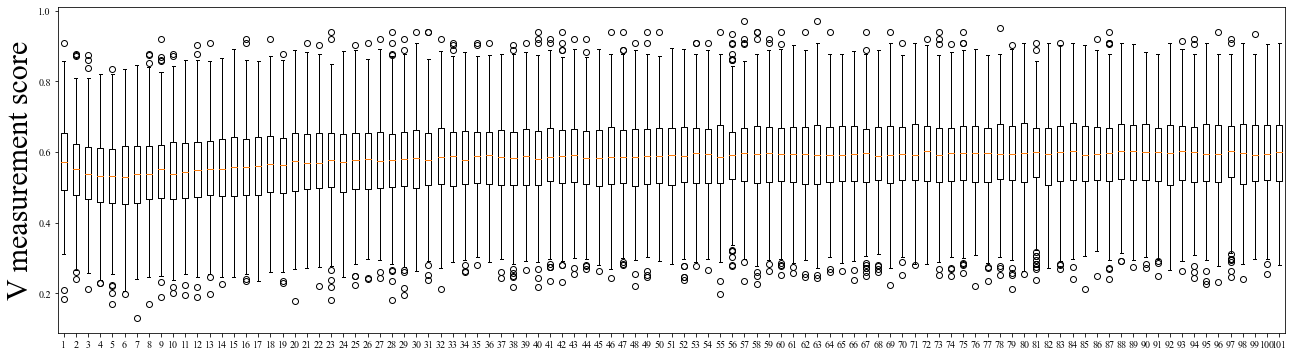

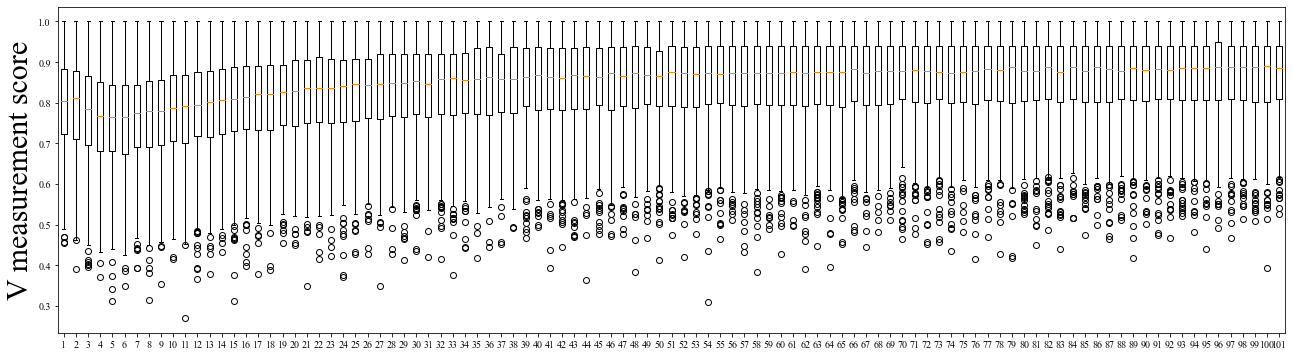

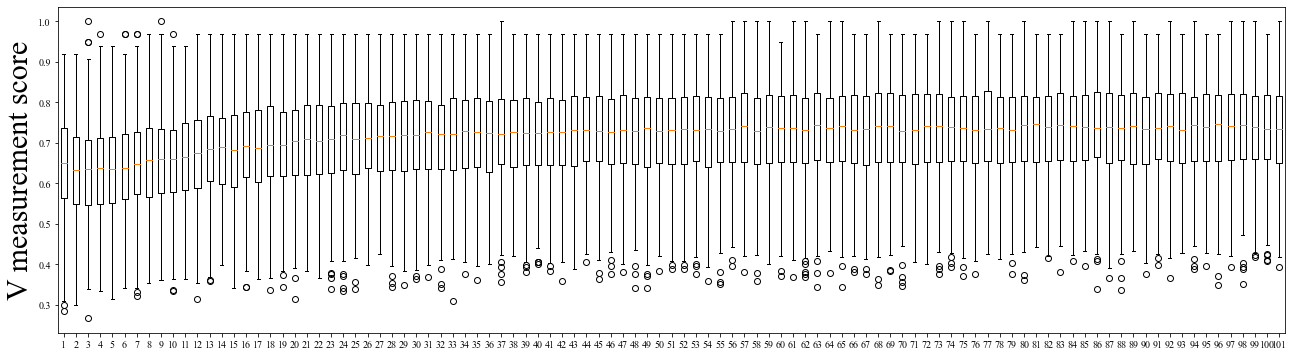

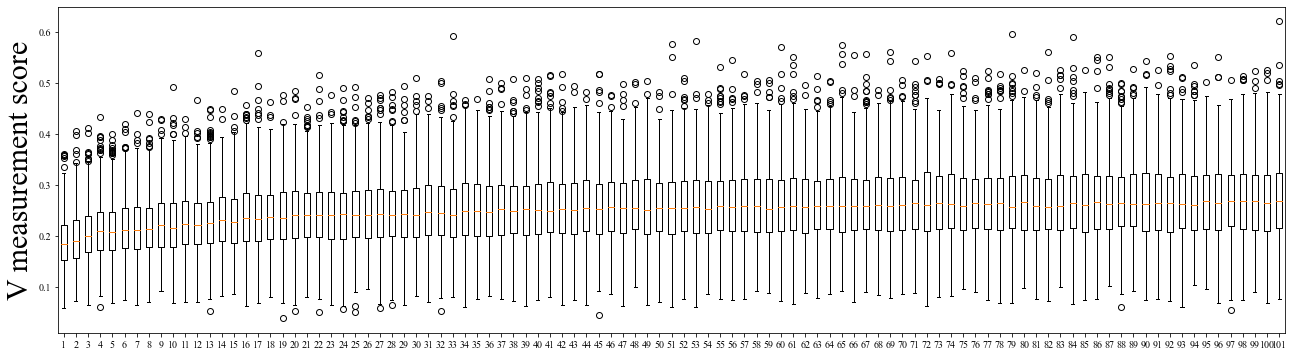

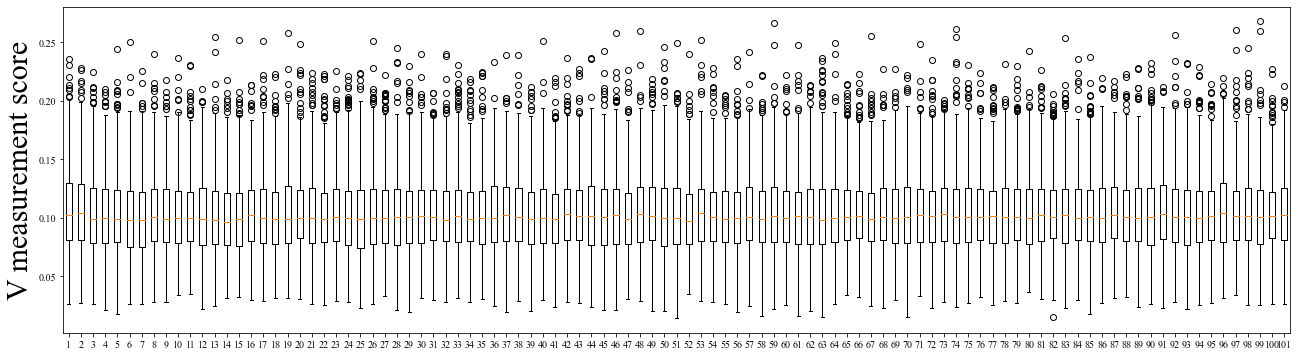

In [181]:
for data in datas:
    v_score = pd.read_csv('./logs/baseline/output/resnet10_simclr_LS_default/{}/05way_005shot_full_default/v_score_query.csv'.format(data), index_col='Unnamed: 0')
    fig = plt.figure(figsize=(22,6))
    plt.boxplot(v_score)
    plt.xticks()
    #plt.yticks(np.arange(0, 101, 10), fontsize = 20)
    plt.ylabel("V measurement score", fontsize=30)
    #plt.title(data, fontsize=30)
    plt.savefig('./img_pdf/v_score/query/boxplot/5shot_{}.pdf'.format(data), bbox_inches='tight', format='pdf')
    # plt.legend(fontsize=20, loc=1)
#plt.close()

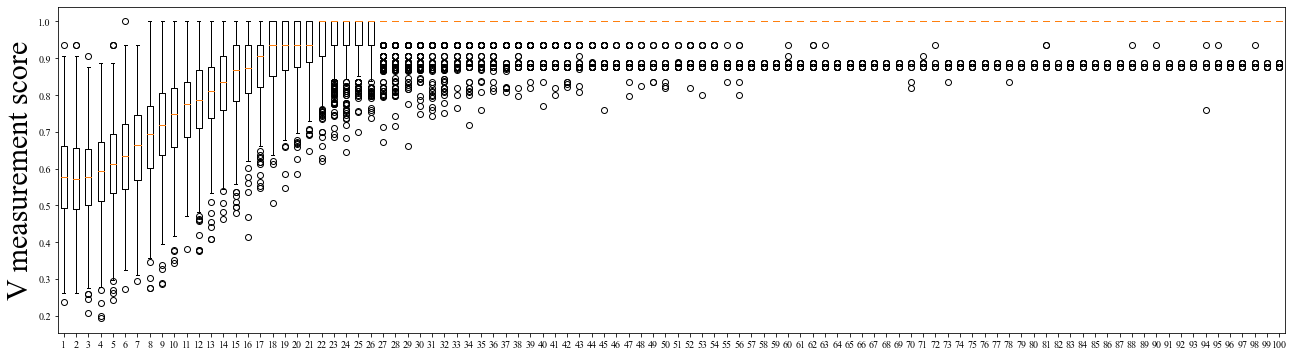

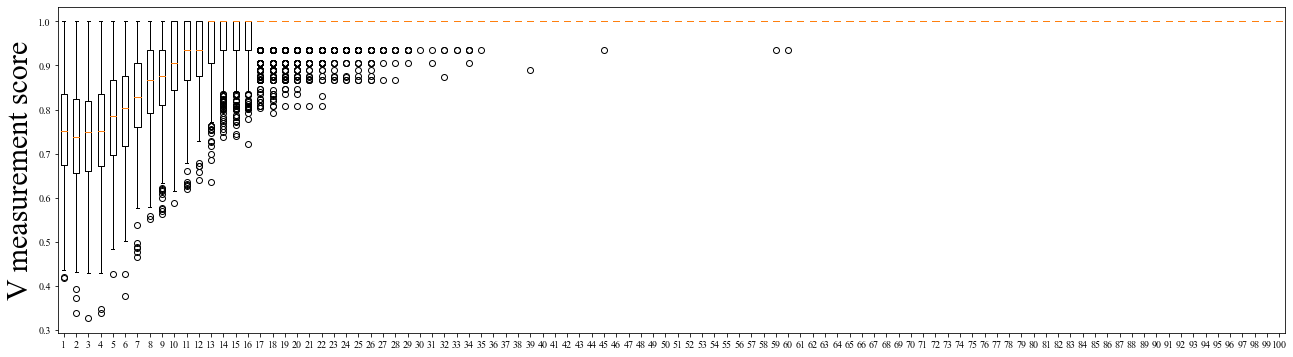

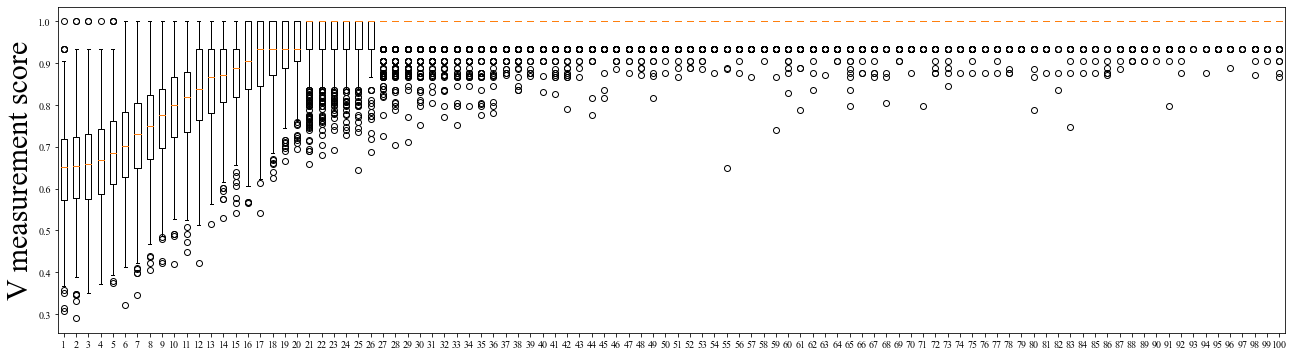

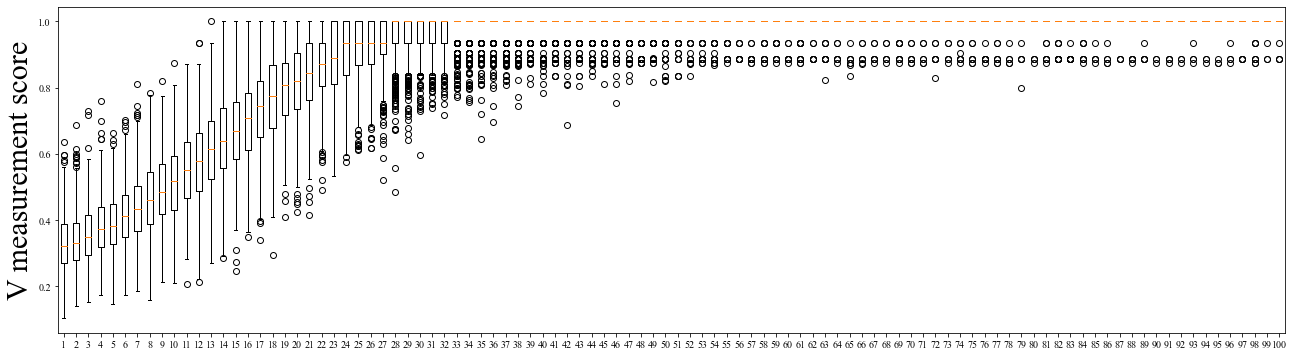

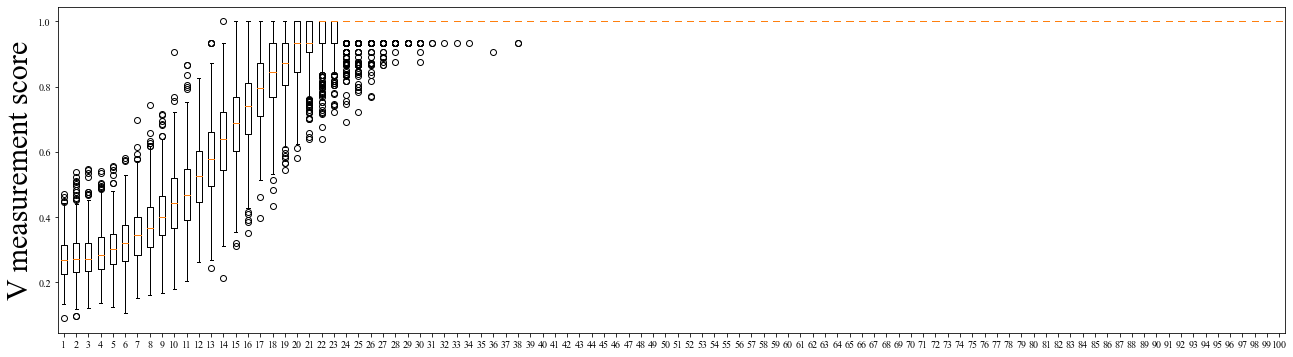

In [183]:
for data in datas:
    v_score = pd.read_csv('./logs/baseline/output/resnet10_simclr_LS_default/{}/05way_005shot_full_default/v_score_support.csv'.format(data), index_col='Unnamed: 0')
    fig = plt.figure(figsize=(22,6))
    plt.boxplot(v_score)
    plt.xticks()
    #plt.yticks(np.arange(0, 101, 10), fontsize = 20)
    plt.ylabel("V measurement score", fontsize=30)
    #plt.title(data, fontsize=30)
    plt.savefig('./img_pdf/v_score/support/boxplot/5shot_{}.pdf'.format(data), bbox_inches='tight', format='pdf')
    # plt.legend(fontsize=20, loc=1)
#plt.close()

In [ ]:
CD-FSL/logs/baseline/output/resnet10_simclr_LS_default/mini_test/05way_001shot_full_default/augmentation/base/test_history.csv

In [187]:
for data in datas:
    for shot in ['1shot', '5shot']:
        path_0 = './logs/baseline/output/resnet10_simclr_LS_default/{}/05way_00{}_full_default/augmentation/base/v_score_query_0.csv'.format(data, shot)
        path = './logs/baseline/output/resnet10_simclr_LS_default/{}/05way_00{}_full_default/augmentation/base/v_score_query.csv'.format(data, shot)
        v_0 = pd.read_csv(path_0, index_col='Unnamed: 0')
        v = pd.read_csv(path, index_col='Unnamed: 0')
        v_concat = pd.concat([v_0, v], axis = 1)
        
        #v_concat.to_csv(path)

In [186]:
v_concat

,epoch0,epoch1,epoch2,epoch3,epoch4,epoch5,epoch6,epoch7,epoch8,epoch9,...,epoch91,epoch92,epoch93,epoch94,epoch95,epoch96,epoch97,epoch98,epoch99,epoch100
1,0.080022,0.107913,0.089071,0.109248,0.102116,0.129284,0.117865,0.094234,0.155557,0.103335,...,0.145142,0.084033,0.101463,0.127683,0.069479,0.082141,0.080579,0.088370,0.082442,0.069802
2,0.167079,0.158042,0.144503,0.176196,0.113058,0.088971,0.179078,0.147620,0.090086,0.119617,...,0.129803,0.116291,0.124680,0.085992,0.126019,0.090721,0.099171,0.118645,0.062481,0.103079
3,0.075434,0.052285,0.056277,0.054426,0.079581,0.082037,0.088986,0.083599,0.104569,0.089175,...,0.136373,0.110427,0.086552,0.122004,0.082542,0.132165,0.080821,0.092202,0.120702,0.046574
4,0.117317,0.131374,0.090642,0.121963,0.078674,0.087896,0.084976,0.112742,0.080083,0.136769,...,0.086449,0.095738,0.072993,0.156170,0.105803,0.069849,0.102403,0.115147,0.129600,0.077441
5,0.084152,0.097973,0.133288,0.101488,0.163411,0.058214,0.096218,0.109511,0.090462,0.081805,...,0.240567,0.121352,0.099063,0.127122,0.083323,0.112659,0.074044,0.135366,0.089734,0.100368
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
596,0.122335,0.115394,0.094486,0.090341,0.117425,0.095920,0.125200,0.092020,0.090301,0.092149,...,0.082999,0.080815,0.120986,0.105192,0.120870,0.097597,0.072963,0.062540,0.128689,0.059123
597,0.083639,0.078997,0.034558,0.108322,0.153484,0.093874,0.122421,0.111888,0.080585,0.087067,...,0.093357,0.091798,0.111524,0.067776,0.078503,0.104863,0.092898,0.110139,0.101195,0.133480
598,0.158247,0.131647,0.138984,0.133480,0.147366,0.159396,0.104224,0.157656,0.104337,0.122537,...,0.116278,0.135104,0.109037,0.108799,0.134180,0.170254,0.163835,0.163604,0.136762,0.114224
599,0.084282,0.124064,0.063750,0.066286,0.130433,0.140916,0.072558,0.128350,0.073197,0.069116,...,0.088434,0.117137,0.103498,0.105607,0.052819,0.083874,0.076738,0.085923,0.071363,0.108351


In [146]:
df = pd.DataFrame(None, index= datas, columns= ['1shot', '5shot'] )
for data in datas:
    for shot in ['1shot', '5shot']:
        v_score = pd.read_csv('./logs/baseline/output/resnet10_simclr_LS_default/{}/05way_00{}_full_default/v_score_query.csv'.format(data,shot), index_col='Unnamed: 0')
        init = v_score.iloc[:, 0].mean()
        final = v_score.iloc[:, -1].mean()
        diff = (final-init)/init * 100
        result = "{:.3f}, {:.3f}, ({:.3f}%)".format(init, final, diff)
        df.loc[data][shot] = result

In [147]:
df

,1shot,5shot
mini_test,"0.572, 0.490, (-14.460%)","0.574, 0.600, (4.444%)"
crop,"0.792, 0.736, (-7.181%)","0.794, 0.868, (9.402%)"
euro,"0.644, 0.616, (-4.343%)","0.648, 0.730, (12.741%)"
isic,"0.187, 0.206, (9.671%)","0.188, 0.271, (43.987%)"
chest,"0.108, 0.101, (-6.049%)","0.108, 0.105, (-3.059%)"


<AxesSubplot:>

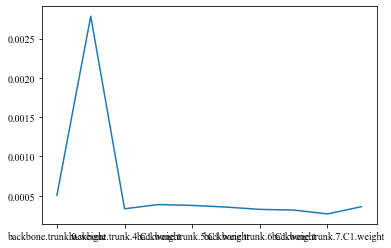

In [216]:
diff_columns = []
for layer_name in diff.columns:
    if 'BN' not in layer_name and 'shortcut' not in layer_name and 'bias' not in layer_name:
        diff_columns.append(layer_name)
diff[diff_columns].iloc[:,:-3].mean().plot()

In [219]:
diff[diff_columns].iloc[:,:-3].mean()

backbone.trunk.0.weight       0.000507
backbone.trunk.1.weight       0.002784
backbone.trunk.4.C1.weight    0.000334
backbone.trunk.4.C2.weight    0.000388
backbone.trunk.5.C1.weight    0.000377
backbone.trunk.5.C2.weight    0.000356
backbone.trunk.6.C1.weight    0.000327
backbone.trunk.6.C2.weight    0.000318
backbone.trunk.7.C1.weight    0.000269
backbone.trunk.7.C2.weight    0.000361
dtype: float64

In [227]:
path = './logs/baseline/output/resnet10_simclr_LS_default/{}/05way_001shot_full_default/layer_diff.csv'.format('chest')
diff = pd.read_csv(path, index_col='Unnamed: 0')
diff

,backbone.trunk.0.weight,backbone.trunk.1.weight,backbone.trunk.1.bias,backbone.trunk.4.C1.weight,backbone.trunk.4.BN1.weight,backbone.trunk.4.BN1.bias,backbone.trunk.4.C2.weight,backbone.trunk.4.BN2.weight,backbone.trunk.4.BN2.bias,backbone.trunk.5.C1.weight,...,backbone.trunk.7.BN2.bias,backbone.trunk.7.shortcut.weight,backbone.trunk.7.BNshortcut.weight,backbone.trunk.7.BNshortcut.bias,classifier.weight,classifier.bias,head.fc1.weight,head.fc1.bias,head.fc2.weight,head.fc2.bias
1,0.000537,0.002537,0.001437,0.000308,0.002598,0.002248,0.000385,0.002022,0.001193,0.000363,...,0.000631,0.000622,0.000839,0.000631,0.0,0.0,0.0,0.0,0.0,0.0
2,0.000518,0.002304,0.001478,0.000328,0.002254,0.002290,0.000386,0.001843,0.001062,0.000361,...,0.000579,0.000610,0.000885,0.000579,0.0,0.0,0.0,0.0,0.0,0.0
3,0.000400,0.002579,0.001460,0.000343,0.002954,0.003153,0.000373,0.001915,0.001312,0.000370,...,0.000641,0.000620,0.000880,0.000641,0.0,0.0,0.0,0.0,0.0,0.0
4,0.000479,0.002485,0.001461,0.000322,0.002419,0.002170,0.000389,0.001965,0.001105,0.000388,...,0.000615,0.000607,0.000888,0.000615,0.0,0.0,0.0,0.0,0.0,0.0
5,0.000464,0.003394,0.001390,0.000351,0.002722,0.003224,0.000381,0.001923,0.001270,0.000373,...,0.000585,0.000615,0.000873,0.000585,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
596,0.000630,0.003767,0.001651,0.000379,0.003000,0.003011,0.000419,0.002257,0.001124,0.000382,...,0.000581,0.000602,0.000886,0.000581,0.0,0.0,0.0,0.0,0.0,0.0
597,0.000519,0.002347,0.001479,0.000343,0.002709,0.002695,0.000411,0.002467,0.001425,0.000387,...,0.000612,0.000595,0.000919,0.000612,0.0,0.0,0.0,0.0,0.0,0.0
598,0.000575,0.002951,0.001159,0.000338,0.002431,0.002546,0.000394,0.002375,0.001128,0.000371,...,0.000561,0.000603,0.000897,0.000561,0.0,0.0,0.0,0.0,0.0,0.0
599,0.000425,0.003145,0.001531,0.000335,0.002775,0.003277,0.000377,0.001761,0.001122,0.000368,...,0.000649,0.000612,0.000854,0.000649,0.0,0.0,0.0,0.0,0.0,0.0


,backbone.trunk.0.weight,backbone.trunk.1.weight,backbone.trunk.1.bias,backbone.trunk.4.C1.weight,backbone.trunk.4.BN1.weight,backbone.trunk.4.BN1.bias,backbone.trunk.4.C2.weight,backbone.trunk.4.BN2.weight,backbone.trunk.4.BN2.bias,backbone.trunk.5.C1.weight,...,backbone.trunk.7.BN2.bias,backbone.trunk.7.shortcut.weight,backbone.trunk.7.BNshortcut.weight,backbone.trunk.7.BNshortcut.bias,classifier.weight,classifier.bias,head.fc1.weight,head.fc1.bias,head.fc2.weight,head.fc2.bias
1,0.000537,0.002537,0.001437,0.000308,0.002598,0.002248,0.000385,0.002022,0.001193,0.000363,...,0.000631,0.000622,0.000839,0.000631,0.0,0.0,0.0,0.0,0.0,0.0
2,0.000518,0.002304,0.001478,0.000328,0.002254,0.002290,0.000386,0.001843,0.001062,0.000361,...,0.000579,0.000610,0.000885,0.000579,0.0,0.0,0.0,0.0,0.0,0.0
3,0.000400,0.002579,0.001460,0.000343,0.002954,0.003153,0.000373,0.001915,0.001312,0.000370,...,0.000641,0.000620,0.000880,0.000641,0.0,0.0,0.0,0.0,0.0,0.0
4,0.000479,0.002485,0.001461,0.000322,0.002419,0.002170,0.000389,0.001965,0.001105,0.000388,...,0.000615,0.000607,0.000888,0.000615,0.0,0.0,0.0,0.0,0.0,0.0
5,0.000464,0.003394,0.001390,0.000351,0.002722,0.003224,0.000381,0.001923,0.001270,0.000373,...,0.000585,0.000615,0.000873,0.000585,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
596,0.000630,0.003767,0.001651,0.000379,0.003000,0.003011,0.000419,0.002257,0.001124,0.000382,...,0.000581,0.000602,0.000886,0.000581,0.0,0.0,0.0,0.0,0.0,0.0
597,0.000519,0.002347,0.001479,0.000343,0.002709,0.002695,0.000411,0.002467,0.001425,0.000387,...,0.000612,0.000595,0.000919,0.000612,0.0,0.0,0.0,0.0,0.0,0.0
598,0.000575,0.002951,0.001159,0.000338,0.002431,0.002546,0.000394,0.002375,0.001128,0.000371,...,0.000561,0.000603,0.000897,0.000561,0.0,0.0,0.0,0.0,0.0,0.0
599,0.000425,0.003145,0.001531,0.000335,0.002775,0.003277,0.000377,0.001761,0.001122,0.000368,...,0.000649,0.000612,0.000854,0.000649,0.0,0.0,0.0,0.0,0.0,0.0


,backbone.trunk.0.weight,backbone.trunk.1.weight,backbone.trunk.1.bias,backbone.trunk.4.C1.weight,backbone.trunk.4.BN1.weight,backbone.trunk.4.BN1.bias,backbone.trunk.4.C2.weight,backbone.trunk.4.BN2.weight,backbone.trunk.4.BN2.bias,backbone.trunk.5.C1.weight,...,backbone.trunk.7.BN2.bias,backbone.trunk.7.shortcut.weight,backbone.trunk.7.BNshortcut.weight,backbone.trunk.7.BNshortcut.bias,classifier.weight,classifier.bias,head.fc1.weight,head.fc1.bias,head.fc2.weight,head.fc2.bias
1,0.000537,0.002537,0.001437,0.000308,0.002598,0.002248,0.000385,0.002022,0.001193,0.000363,...,0.000631,0.000622,0.000839,0.000631,0.0,0.0,0.0,0.0,0.0,0.0
2,0.000518,0.002304,0.001478,0.000328,0.002254,0.002290,0.000386,0.001843,0.001062,0.000361,...,0.000579,0.000610,0.000885,0.000579,0.0,0.0,0.0,0.0,0.0,0.0
3,0.000400,0.002579,0.001460,0.000343,0.002954,0.003153,0.000373,0.001915,0.001312,0.000370,...,0.000641,0.000620,0.000880,0.000641,0.0,0.0,0.0,0.0,0.0,0.0
4,0.000479,0.002485,0.001461,0.000322,0.002419,0.002170,0.000389,0.001965,0.001105,0.000388,...,0.000615,0.000607,0.000888,0.000615,0.0,0.0,0.0,0.0,0.0,0.0
5,0.000464,0.003394,0.001390,0.000351,0.002722,0.003224,0.000381,0.001923,0.001270,0.000373,...,0.000585,0.000615,0.000873,0.000585,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
596,0.000630,0.003767,0.001651,0.000379,0.003000,0.003011,0.000419,0.002257,0.001124,0.000382,...,0.000581,0.000602,0.000886,0.000581,0.0,0.0,0.0,0.0,0.0,0.0
597,0.000519,0.002347,0.001479,0.000343,0.002709,0.002695,0.000411,0.002467,0.001425,0.000387,...,0.000612,0.000595,0.000919,0.000612,0.0,0.0,0.0,0.0,0.0,0.0
598,0.000575,0.002951,0.001159,0.000338,0.002431,0.002546,0.000394,0.002375,0.001128,0.000371,...,0.000561,0.000603,0.000897,0.000561,0.0,0.0,0.0,0.0,0.0,0.0
599,0.000425,0.003145,0.001531,0.000335,0.002775,0.003277,0.000377,0.001761,0.001122,0.000368,...,0.000649,0.000612,0.000854,0.000649,0.0,0.0,0.0,0.0,0.0,0.0


,backbone.trunk.0.weight,backbone.trunk.1.weight,backbone.trunk.1.bias,backbone.trunk.4.C1.weight,backbone.trunk.4.BN1.weight,backbone.trunk.4.BN1.bias,backbone.trunk.4.C2.weight,backbone.trunk.4.BN2.weight,backbone.trunk.4.BN2.bias,backbone.trunk.5.C1.weight,...,backbone.trunk.7.BN2.bias,backbone.trunk.7.shortcut.weight,backbone.trunk.7.BNshortcut.weight,backbone.trunk.7.BNshortcut.bias,classifier.weight,classifier.bias,head.fc1.weight,head.fc1.bias,head.fc2.weight,head.fc2.bias
1,0.000537,0.002537,0.001437,0.000308,0.002598,0.002248,0.000385,0.002022,0.001193,0.000363,...,0.000631,0.000622,0.000839,0.000631,0.0,0.0,0.0,0.0,0.0,0.0
2,0.000518,0.002304,0.001478,0.000328,0.002254,0.002290,0.000386,0.001843,0.001062,0.000361,...,0.000579,0.000610,0.000885,0.000579,0.0,0.0,0.0,0.0,0.0,0.0
3,0.000400,0.002579,0.001460,0.000343,0.002954,0.003153,0.000373,0.001915,0.001312,0.000370,...,0.000641,0.000620,0.000880,0.000641,0.0,0.0,0.0,0.0,0.0,0.0
4,0.000479,0.002485,0.001461,0.000322,0.002419,0.002170,0.000389,0.001965,0.001105,0.000388,...,0.000615,0.000607,0.000888,0.000615,0.0,0.0,0.0,0.0,0.0,0.0
5,0.000464,0.003394,0.001390,0.000351,0.002722,0.003224,0.000381,0.001923,0.001270,0.000373,...,0.000585,0.000615,0.000873,0.000585,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
596,0.000630,0.003767,0.001651,0.000379,0.003000,0.003011,0.000419,0.002257,0.001124,0.000382,...,0.000581,0.000602,0.000886,0.000581,0.0,0.0,0.0,0.0,0.0,0.0
597,0.000519,0.002347,0.001479,0.000343,0.002709,0.002695,0.000411,0.002467,0.001425,0.000387,...,0.000612,0.000595,0.000919,0.000612,0.0,0.0,0.0,0.0,0.0,0.0
598,0.000575,0.002951,0.001159,0.000338,0.002431,0.002546,0.000394,0.002375,0.001128,0.000371,...,0.000561,0.000603,0.000897,0.000561,0.0,0.0,0.0,0.0,0.0,0.0
599,0.000425,0.003145,0.001531,0.000335,0.002775,0.003277,0.000377,0.001761,0.001122,0.000368,...,0.000649,0.000612,0.000854,0.000649,0.0,0.0,0.0,0.0,0.0,0.0


,backbone.trunk.0.weight,backbone.trunk.1.weight,backbone.trunk.1.bias,backbone.trunk.4.C1.weight,backbone.trunk.4.BN1.weight,backbone.trunk.4.BN1.bias,backbone.trunk.4.C2.weight,backbone.trunk.4.BN2.weight,backbone.trunk.4.BN2.bias,backbone.trunk.5.C1.weight,...,backbone.trunk.7.BN2.bias,backbone.trunk.7.shortcut.weight,backbone.trunk.7.BNshortcut.weight,backbone.trunk.7.BNshortcut.bias,classifier.weight,classifier.bias,head.fc1.weight,head.fc1.bias,head.fc2.weight,head.fc2.bias
1,0.000537,0.002537,0.001437,0.000308,0.002598,0.002248,0.000385,0.002022,0.001193,0.000363,...,0.000631,0.000622,0.000839,0.000631,0.0,0.0,0.0,0.0,0.0,0.0
2,0.000518,0.002304,0.001478,0.000328,0.002254,0.002290,0.000386,0.001843,0.001062,0.000361,...,0.000579,0.000610,0.000885,0.000579,0.0,0.0,0.0,0.0,0.0,0.0
3,0.000400,0.002579,0.001460,0.000343,0.002954,0.003153,0.000373,0.001915,0.001312,0.000370,...,0.000641,0.000620,0.000880,0.000641,0.0,0.0,0.0,0.0,0.0,0.0
4,0.000479,0.002485,0.001461,0.000322,0.002419,0.002170,0.000389,0.001965,0.001105,0.000388,...,0.000615,0.000607,0.000888,0.000615,0.0,0.0,0.0,0.0,0.0,0.0
5,0.000464,0.003394,0.001390,0.000351,0.002722,0.003224,0.000381,0.001923,0.001270,0.000373,...,0.000585,0.000615,0.000873,0.000585,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
596,0.000630,0.003767,0.001651,0.000379,0.003000,0.003011,0.000419,0.002257,0.001124,0.000382,...,0.000581,0.000602,0.000886,0.000581,0.0,0.0,0.0,0.0,0.0,0.0
597,0.000519,0.002347,0.001479,0.000343,0.002709,0.002695,0.000411,0.002467,0.001425,0.000387,...,0.000612,0.000595,0.000919,0.000612,0.0,0.0,0.0,0.0,0.0,0.0
598,0.000575,0.002951,0.001159,0.000338,0.002431,0.002546,0.000394,0.002375,0.001128,0.000371,...,0.000561,0.000603,0.000897,0.000561,0.0,0.0,0.0,0.0,0.0,0.0
599,0.000425,0.003145,0.001531,0.000335,0.002775,0.003277,0.000377,0.001761,0.001122,0.000368,...,0.000649,0.000612,0.000854,0.000649,0.0,0.0,0.0,0.0,0.0,0.0


,backbone.trunk.0.weight,backbone.trunk.1.weight,backbone.trunk.1.bias,backbone.trunk.4.C1.weight,backbone.trunk.4.BN1.weight,backbone.trunk.4.BN1.bias,backbone.trunk.4.C2.weight,backbone.trunk.4.BN2.weight,backbone.trunk.4.BN2.bias,backbone.trunk.5.C1.weight,...,backbone.trunk.7.BN2.bias,backbone.trunk.7.shortcut.weight,backbone.trunk.7.BNshortcut.weight,backbone.trunk.7.BNshortcut.bias,classifier.weight,classifier.bias,head.fc1.weight,head.fc1.bias,head.fc2.weight,head.fc2.bias
1,0.000537,0.002537,0.001437,0.000308,0.002598,0.002248,0.000385,0.002022,0.001193,0.000363,...,0.000631,0.000622,0.000839,0.000631,0.0,0.0,0.0,0.0,0.0,0.0
2,0.000518,0.002304,0.001478,0.000328,0.002254,0.002290,0.000386,0.001843,0.001062,0.000361,...,0.000579,0.000610,0.000885,0.000579,0.0,0.0,0.0,0.0,0.0,0.0
3,0.000400,0.002579,0.001460,0.000343,0.002954,0.003153,0.000373,0.001915,0.001312,0.000370,...,0.000641,0.000620,0.000880,0.000641,0.0,0.0,0.0,0.0,0.0,0.0
4,0.000479,0.002485,0.001461,0.000322,0.002419,0.002170,0.000389,0.001965,0.001105,0.000388,...,0.000615,0.000607,0.000888,0.000615,0.0,0.0,0.0,0.0,0.0,0.0
5,0.000464,0.003394,0.001390,0.000351,0.002722,0.003224,0.000381,0.001923,0.001270,0.000373,...,0.000585,0.000615,0.000873,0.000585,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
596,0.000630,0.003767,0.001651,0.000379,0.003000,0.003011,0.000419,0.002257,0.001124,0.000382,...,0.000581,0.000602,0.000886,0.000581,0.0,0.0,0.0,0.0,0.0,0.0
597,0.000519,0.002347,0.001479,0.000343,0.002709,0.002695,0.000411,0.002467,0.001425,0.000387,...,0.000612,0.000595,0.000919,0.000612,0.0,0.0,0.0,0.0,0.0,0.0
598,0.000575,0.002951,0.001159,0.000338,0.002431,0.002546,0.000394,0.002375,0.001128,0.000371,...,0.000561,0.000603,0.000897,0.000561,0.0,0.0,0.0,0.0,0.0,0.0
599,0.000425,0.003145,0.001531,0.000335,0.002775,0.003277,0.000377,0.001761,0.001122,0.000368,...,0.000649,0.000612,0.000854,0.000649,0.0,0.0,0.0,0.0,0.0,0.0


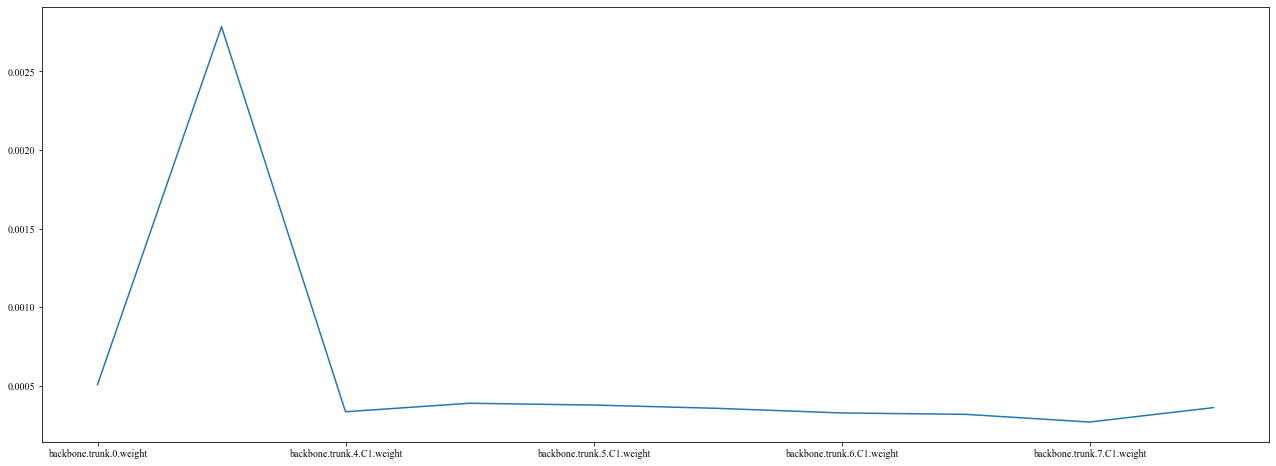

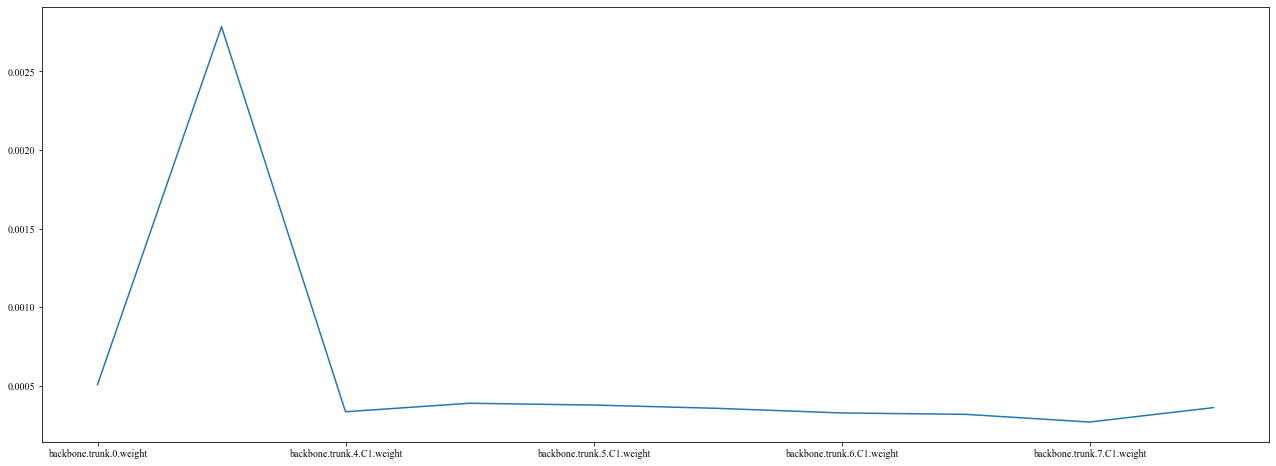

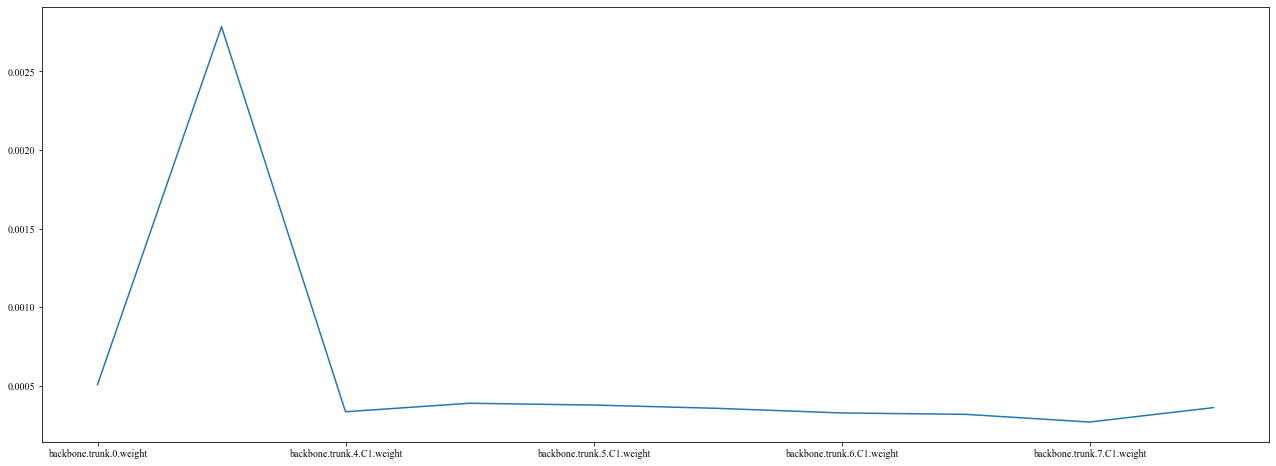

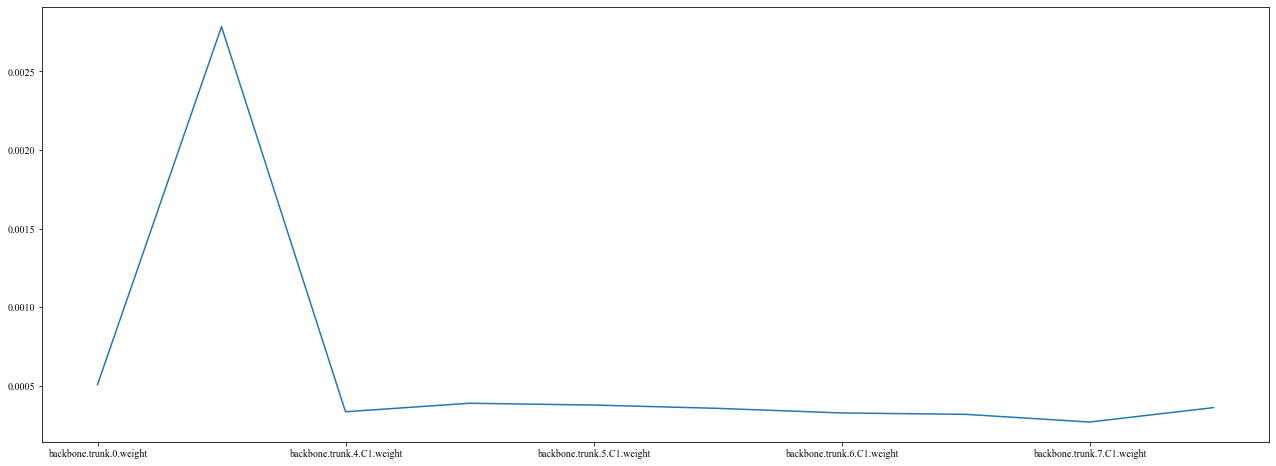

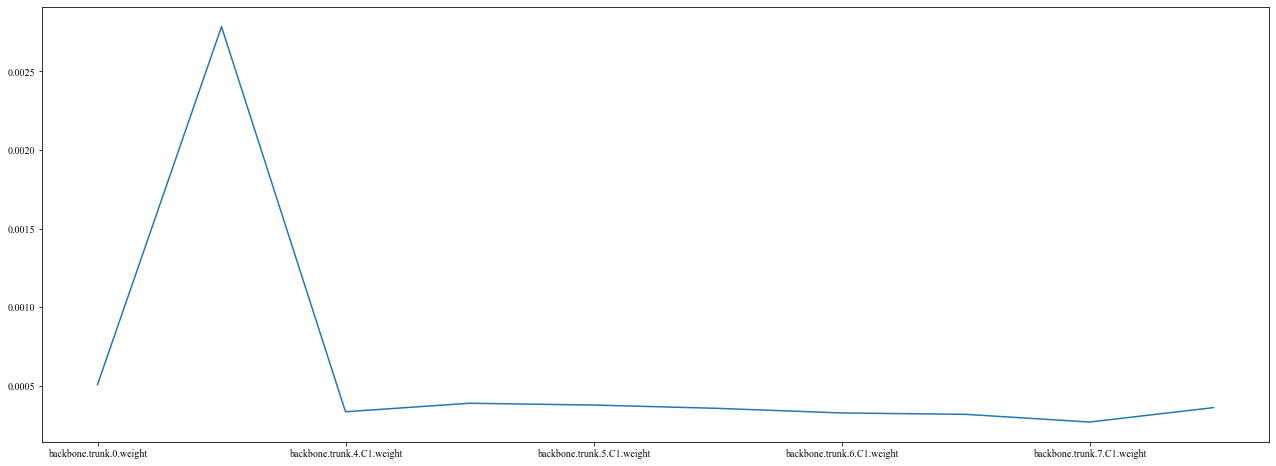

In [223]:
for data in datas:
    plt.subplots(figsize = (22, 8))
    path = './logs/baseline/output/resnet10_simclr_LS_default/{}/05way_001shot_full_default/layer_diff.csv'.format(data)
    diff = pd.read_csv(path, index_col='Unnamed: 0')
    diff_columns = []
    for layer_name in diff.columns:
        if 'BN' not in layer_name and 'shortcut' not in layer_name and 'bias' not in layer_name:
            diff_columns.append(layer_name)
    display(diff)
    diff[diff_columns].iloc[:,:-3].mean().plot()